##Computing GCD

Fullform :- Greatest Common Divisor

let a function gcd(m,n)
where the returned value k is the largest value that divides bothe m and n


*Note: GCD always exists as 1 always divides both m and n*


**Time taken**

Notice that both have a for loop which itterates till the min of the two gcd numbers

therefore they both take time propotional to min(n,m)


**<:Brute force method:>**

In [ ]:
def min(m,n):
  return m if m<n else n
def gcd(m,n):
  temp=0
  for i in range(1,min(m,n)+1):
    if (m%i == 0 and n%i ==0):
      temp = i
  return temp


Lets suppose d divides m and n

$$\ m=a.d$$ and $$\ n=b.d $$

implies

$$\ m-n = (a-b). d$$

i.e. d also divides m-n

In [ ]:
def gcd(m,n):
  (a,b) = (max(m,n),min(m,n))         #to get non negative a-b and to to have a proper %
  if (a%b == 0):                      #base case
    return b                          #call stack collaps when b is able to divide a
  else:
    return(gcd(b,a-b))                #recursive call

The above actually takes time propotional to max(m,n)

for instance example


```
gcd(2,9999) - - > gcd(2,9998) - - > gcd(2,9996)... gcd(2,3) - - > gcd(2,1) - -> 1
```

the above took ~5000 steps (10000/2)


**EUCLID'S ALGORITHM**

Suppose n does not divide m

implies that

$$\ m = q×n + r$$

where

*q* is quotient

*r* is remainder

now let *d* divide both *m* and *n*

$$\ m=ad, n=bd$$

on substituting

$$\ ad = q×(bd) + r$$

implies

$$\ r=d×(a-qb)$$

thereore

not only does *m - n* have d as factor but *m % n* also has *d* as factor

therefore we can change the recrusssive call to be mod to make it more efficient

In [ ]:
def gcd(m,n):
  (a,b) = (max(m,n),min(m,n))
  if (a % b == 0):
    return b
  else:
    return gcd(b,a%b)

The above is actually a huge improvent as it takes time propotional to *DIGITS IN max(m,n)*

for instance
```
gcd(2,9999) - - > gcd(2,1) - -> 1
```
~propotional to digits of max(2, 9999) i.e. 4

Good Job understanding your first non-trivial algorithim!

*Test coded for functions*

In [ ]:
n=int(input('Enter value of n: '))
m=int(input('Enter value of m: '))
print('GCD of m , n is : ',gcd(m,n))

Enter value of n: 99
Enter value of m: 36
GCD of m , n is :  9


#Factor list
takes a list an returns a list with all it's factors

factors(n)
returns factors of n

In [ ]:
def factors(n):
  return [i for i in range(1,n+1) if (n%i == 0)]

*Test code for function*

In [ ]:
n=int(input('Enter value of n: '))
print('Factors of n are : ',factors(n))

Enter value of n: 12
Factors of n are :  [1, 2, 3, 4, 6, 12]


#Prime Number 1.0

Function which retuens whether a number is prime or not


prime(n)
returns whether n is prime or not


**Method 1:**

using thefactor list method

In [ ]:
def isprime(n):
  return True if factors(n) == [1,n] else False

**Method 2:**

Using *Sieve of Eratosthenes*

In [ ]:
def prime_list(n):
  lst=list(range(2,n+1))
  for i in lst:
    mult_list=[]
    for t in range(2,n+1):
      if i*t>n:
        break
      else:
        mult_list.append(i*t)
    for j in mult_list:
      if j in lst:
        lst.remove(j)
  return(lst)

Test code

In [ ]:
print(prime_list(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


simple isprime implementation is

In [ ]:
def isprime(n):
  return True if n == prime_list(n)[-1] else False

We can make it quicker, we can reduce the size of loop

$$\sqrt{n}$$

as the factors occur in pairs

$$ \sqrt{n} × \sqrt{n} = n$$


In [ ]:
import math
def isprime(n):
  (result,i) = (True,2)
  while (result and i<math.sqrt(n)):
    if (n%i == 0):
      result = False
    i+=1
  return result

**Test code for them all**

In [ ]:
n=int(input("Enter Number : "))
print(isprime(n))

Enter Number : 891
False


Properties of prime numbers:

1) There are infinetely many prime numbers

2) ques : How are they distributeed
    
    a) Twin prime numbers:
      if there is a difference of 2 between 2 prime numbers
      i.e.
      p and p+2 are twin prime if p and p+2 are prime...
      also if you think,
      they must be of
$$\ 2^k-1,2^k + 1 = p, p+2$$

 Twin prime conjecture:
 are there infinitely many twin prime numbers?







In [ ]:
def twin_prime(n):
  last_prime=2
  pd={}                               #prime difference
  for i in range(3,n+1):
    if isprime(i):
      diff= i - last_prime
      last_prime = i
      try:
        pd[diff]+=1
      except:
        pd[diff]=1
  return (pd)

Testing the function

In [ ]:
n=int(input("Enter the number till which we want the prime difference :"))
print(twin_prime(n))

Enter the number till which we want the prime difference :10000
{1: 1, 2: 205, 4: 202, 6: 299, 8: 101, 14: 54, 10: 119, 12: 105, 18: 40, 20: 15, 22: 16, 34: 2, 24: 15, 16: 33, 26: 3, 28: 5, 30: 11, 32: 1, 36: 1}


# Exception Handling

We try to expect errors and provide contingency plan.

Types of errors

*   SynraxError   (Exception handeling is not expected)
*   NameError
*   ZeroDivisionError
*   IndexError -- for lists
*   KeyError  --  for dictionary

*Note: camel case is used to name errors*


**Terminology**

1.   *Raise an exception :*

      type of error with diagonostic information

2.   *Handle an exception :*

      Anticipate and take appropriate actions

3.  *Unhandled Exceptions:*
      
      Leads to abort of execution

Formats
```
try:
code to be tried

except ErrorType:
code to handle error type

except (ErrorType1,ErrorType2):
code to handle multiple errors

except:
code to handle all errors

else:
execute if no error was found

finally:
runs irrespective of whether an error was found or not
```

Errors are inherited by calling function one by one

i.e. suppose
```
f(x) calls g(x) which calls h(x)

error in h(x) if not handled

passes to g(x) if not handled there

passed to f(x) if not handled there
then the program aborts!
```

# Classes and Object

**Abstract Datatype**
Special datatypes to peform certain types of operations

eg

stack follow *last in, first out* (push and pop)
  
queue follows *first in, first out* (enqueue and dequeue)



**Class**


*   Tempelate / blueprint for format ofto store data
*   How public functions and operators channge data

**Object**


*   Instance of a class, a object created and following the rules of the blueprint(viz. class)

In [ ]:
class Complex:
  def __init__(self, a = 0,b = 0):
    self.re = a
    self.im = b
  def __add__(self, ob):                              #operator overloading for addition
    return (Complex(self.re+ob.re,self.im+ob.im))
  def __sub__(self,ob):                               #operator overloading for subtraction
    return (Complex(self.re - ob.re,self.im + ob.im))
  def disp(self):                                     #prints the data
    print(self.re,' + ',self.im,'i\n')
  def mod(self):                                      #gives distance from origin
    import math
    return(math.sqrt((self.re**2) + (self.im**2)))
  def __str__(self):                                  #coverts object to string
    return (str( self.re) + ' + ' + str(self.im) + 'i' )

ob= Complex(2,4)
ob.disp()
print(ob.mod())
print(str(ob))

2  +  4 i

4.47213595499958
2 + 4i


# Timing code

We use a liberary called time



*   perf_time:-while absolute value is meaningless, the difference between two values can give us time between two executions



> Syntax

```
import time
start = time.perf_counter()
...

#code to be tested

...
end = time.perf_counter()

elapsed = end - start
```





In [ ]:
import time
class timer:

  def __init__(self):
    self._start_time = 0
    self._elapsed_time = 0

  def start(self):
    self._start_time = time.perf_counter()

  def stop(self):
    self._elapsed_time = time.perf_counter() - self._start_time()

  def elapsed(self):
    return (self._elapsed_time)

In [ ]:
import time

class TimerError(Exception):          #implies that this class inherits from exception ergo a custom exception
  '''This is a custom exception made by the programer'''

class timer:
  def __init__(self):
    self._start_time = None
    self._elapsed_time = None

  def start(self):
    if self._start_time is not None:
      raise TimerError( 'Timer is running. Please stop by .stop()' )
    self._start_time = time.perf_counter()

  def stop(self):
    if self._start_time is None:
      raise TimerError( 'Timer not started. Please first Start by .start()' )
    self._elapsed_time = time.perf_counter() - self._start_time
    self._start_time = None

  def elapsed(self):
    return self._elapsed_time

  def __str__(self):
    return(str(self._elapsed_time))


In [ ]:
t_obj = timer()
for i in range(4,9):
  t_obj.start()
  n = 0
  for j in range(10 ** i):
    n+=i
  t_obj.stop()
  print('For 10^',i,' + operations, it took :\t',t_obj,' seconds')


For 10^ 4  + operations, it took :	 0.000655987998470664  seconds
For 10^ 5  + operations, it took :	 0.004443275996891316  seconds
For 10^ 6  + operations, it took :	 0.036769311998796184  seconds
For 10^ 7  + operations, it took :	 0.3914667979988735  seconds
For 10^ 8  + operations, it took :	 4.033515839997563  seconds


In [ ]:
import numpy as np
import math
print(np.log2(10**9))
tm = timer()
tm.start()
c=0
t=10**9
while math.floor(t)>0:
  c+=1
  print (t)
  t=t/2
tm.stop()
print (c)
print (t)

29.897352853986263
1000000000
500000000.0
250000000.0
125000000.0
62500000.0
31250000.0
15625000.0
7812500.0
3906250.0
1953125.0
976562.5
488281.25
244140.625
122070.3125
61035.15625
30517.578125
15258.7890625
7629.39453125
3814.697265625
1907.3486328125
953.67431640625
476.837158203125
238.4185791015625
119.20928955078125
59.604644775390625
29.802322387695312
14.901161193847656
7.450580596923828
3.725290298461914
1.862645149230957
30
0.9313225746154785


# Analysis of Algorthms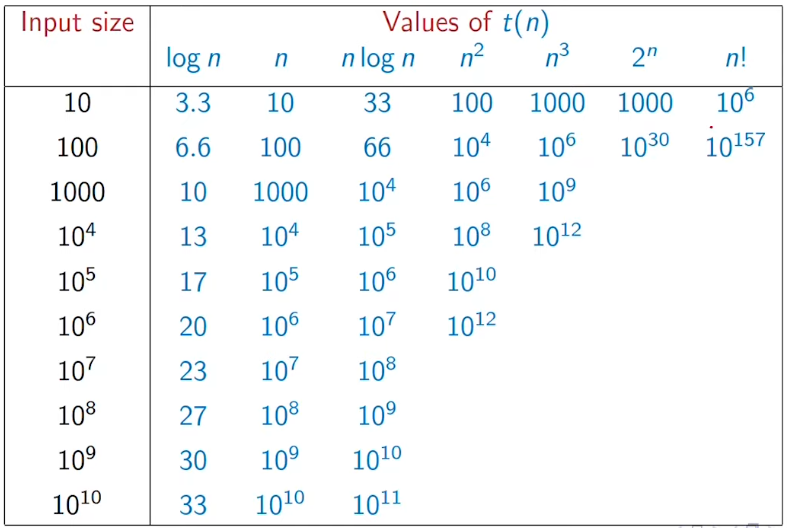

Main sources of interest in analysis are


1.   **Running time :** how long does it take
2.   **Space :**memory requirement

**Time** depends on processing power and it is not as scalable

It also only has a limited effect and inherently inefficient code is inefficient.



**Storage** is also limited by avalable memory but it is relatively more scalable.

Therefore we focus more on time rather than space

It is clear that run time depends on input size and hence
Time efficiency can be as a function if input size

$$t(n)$$

where $t$ is a function and $n$ is the input size

by naive algorithm

$$t(n) ≈ n^2$$

by a mix of linear and binary search

$$t(n)≈\log_2(n).n$$

How to interpret above,

well, $\log_2(n)$ - number of times you need to divide n by 2 to reach 1



---
**Asymptotic Complexity**

What happens for very large n

eg if $f(n) = n^3$ and $g(n) = 5000 . n^2$

even though $f(n) < g(n)$ for $n < 5000$
asymtoticly we say $f(n)$ is slower and $g(n)≈t(n^2)$

adding to before we can also have exponential like




$2^n$ which can be thought of as number of subsets of n elements




---
**Measuring Running Time**

Efficiency metric should be independent of hardware

therefore we measure time in terms of *basic operations*

**Input Size**

this can be


1.   Size of list
2.   Number of objects to be rearranged
3.   Number of vertices or edges in a graph

What what about numeruc problems like to check if n is __ number

Magnitude in such case is misleading and we use number if digits for input size as arithmetic operations generally work digit by digit.

Number of digit is a natural measure of input size where

$\log_b(n)$ where $n$ digits are present in base $b$

**Which input to consider?**

1. average behaveour is hard to compute as instanciating a lot of random inputs and computing expected value is long and sometimes infeasable

2. Therefore we use a **worst case** input:
    these are inputs which forces the algorithem to take the longest possible time

    a.the estimates are pessimistic
    
    b.However, generally, they deliver a good upper bound
---


**How to compare Order of Magnitude**

As we noted earlier we are ignoring the constant in the $t(n)$ function

So how do we compare functions w.r.t order of magnitude

---


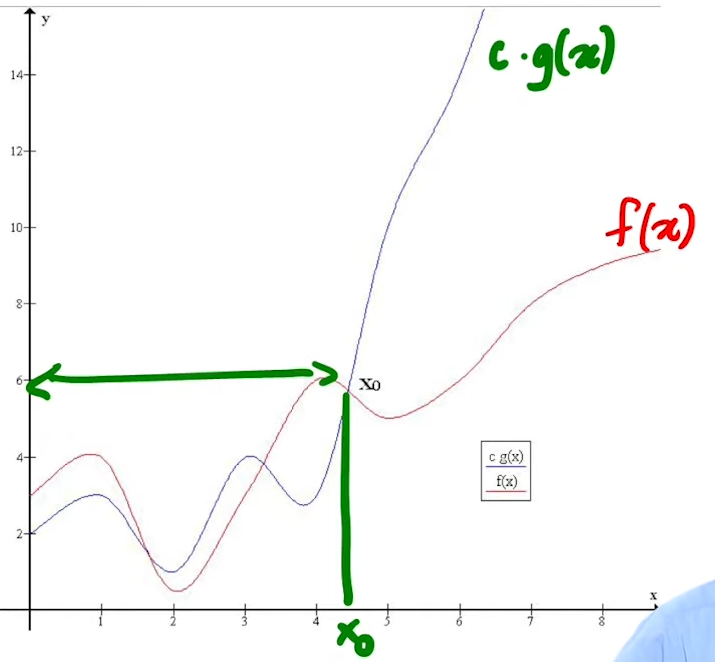

**Big O/ upper bound**

* $f(x)$ is said to be $O(g(x))$ if we can find constants $c$ and $xₒ$ such that $c.g(x)$ is an upper bound for $f(x)$ for $x$ beyond $xₒ$

* $f(x) \le  c.g(x)$ for every $x \ge xₒ$ i.e. after a certain point $xₒ$, $c.g(x)$ becomes an upper bound to $f(x)$



1.
$100n + 5$ is $O(n^2)$

* $$100n + 5 \le 100n + n  = 101 n∀ n \ge 5$$
* also

$$101n \le 101n^2$$

* compare to $$c.g(x)$$

* the critical point $nₒ = 5, c=101,g(x) = n^2$

*note the above is not unique as we could as well take*

$$100n +5 \le 100n +5n = 105n ∀ n≥1$$

$$\implies 105n \le 105n^2$$

therfore now $nₒ = 1,c = 105, g(x) = n^2$

* therefore choice of $nₒ$ and $c$ are not unique

2. $100n^2 + 20n +5$ is $O(n^2)$

$$100 n^2 + 20 n + 5 \le 100n^2 +20n^2 + 5 ^2 = 125n^2 ∀ n \ge 1$$

$$100n^2 + 20 n + 5 \le 125 n^2 ∀ n \ge 1$$

On comparing $nₒ = 1, c = 125, g(x) = n^2$

Therefore we can comclude that in polynomial $O(n^p)$ where $p$ is the highest power in the polynomial


**Properties of big O**

1. $f_1(n) + f_2(n)$ is $O(max(g_1(n),g_2(n)))$

*proof*

$$f_1(n) \le c_1g_1(n) ∀ n>n_1$$
$$f_2(n) \le c_2g_2(n)∀ n>n_2$$

Let $c_3 = max(c_1,c_2), n_3 = max(n_1,n_2)$


for $n \ge n_3 $, $$f_1(n) + f_2(n) \le c_1g_1(n) + c_2g_2(n)$$

$$\implies f_1(n) + f_2(n) \le c_3g_1(n) + c_3g_2(n)$$ as $c_3$ is greater than both $c_1$ and $c_2$

$$f_1(n) + f_2(n) \le c_3(g_1(n) + g_2(n))$$

now as $x+y ≤ 2.max(x,y)$

$$\implies f_1(n) + f_2(n) \le 2.c_3.max(g_1(n) , g_2(n))$$

proves that the least efficient part is the upper bound for the whole algorithm


**Lower Bound**

* $f(x)$ is said to be $Ω(g(x))$ if we can find constants $c$ and $xₒ$ such that $c.g(x)$ is an lower bound for $f(x)$ for $x$ beyond $xₒ$

* $f(x) \ge  c.g(x)$ for every $x \ge xₒ$ i.e. after a certain point $xₒ$, $c.g(x)$ becomes an lower bound to $f(x)$

**Must know**

We generally use Lower bound for a problem statement and not for indivisual algorithm:

For instance:
* Sorting by comparing and swapping will require an $̕Ω(n.log(n))$ irrespective of what algorithm you write
* For searching and declaring existance of an element to be in an unstructured sequence, we have $Ω(n)$

**Tight Bound**
* $f(x)$ is said to be Tight bound if the upper bound is same as the lower bound of the algorithm  i.e. $Θ(g(x)) = O(g(c)) = Ω(g(x))$

* Find constants $c_1 , c_2. x_o$ such that $c_1g(x) \le f(x) \le c_2g(x) ∀ x>x_o$


1. $\frac{n(n-1)}{2}$ is $Θ(n^2)$
for upper bound

$$\frac{n^2}{2}-\frac{n}{2}\le \frac{n^2}{2} ∀ n\ge 0$$


for lower bound

$$\frac{n(n-1)}{2} = \frac{n^2}{2} - \frac{n}{2} \ge \frac{n^2}{2} - (\frac{n}{2}.\frac{n}{2})∀n\ge 2$$


therefore $n_o = 2,c_1 = 1/4,c_2 = 2$

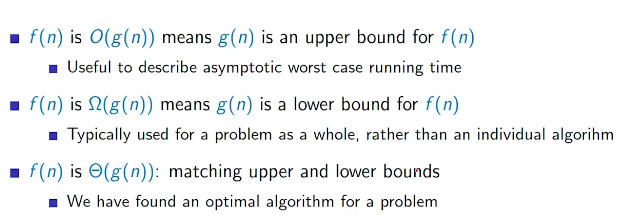


---

# Calculating Complexity

Two types can be observed
1. Iterative
2. Recrusive


In [ ]:
#FInd max

def maxEle(lst):
  m=lst[0]
  for i in lst:
    if m>i:
      m=i
  return m

The above runs through the whole list
therefore always take $n$ steps <br>
Overall timecomplexity is $O(n)$

In [ ]:
#Checking duplicated in a list

def check_dup(lst):
  for i in range(len(lst)):
    for j in range(i+1, len(lst)):
      if lst[i] == lst[j]:
        return False

  return True

The nested inner loop goes through n-1 elements first then n-2 and so on till 1

therefore $$(n-1)+ (n-2) + ... +1$$
$$∑_{i = 1}^{n-1}x$$
using
$$\frac{n(n-1)}{2} - n$$

Overall time is $O(n^2)$ (worst case of no suplicate impling the loop runs fully)

In [ ]:
#Matrix multipication

def mat_mult(A,B):
  (m,n,p) = (len(A),len(B),len(B[0]))

  # note as m X n and n X p leads to m X P matrix


  C=[[0 for i in range(p)] for j in range(m)]

  for i in range(m):
    for j in range(p):
      for k in range(n):
        c[i][j] +=A[i][k]*B[k][j]
  return c

There are 3 nested loops
therefore overall time is
$$O(mnp) \sim O(n^3)$$


In [ ]:
def no_of_bits(n):
  c=0
  while n>1:
    c+=1
    n//=2
  return (c)

as repeaded divisions till we reach 1 we have a

$$O(n)$$

This is a wild tangent I got pulled to

###**Tower of Hanoi**

How to solve recrusive problems

Let $f(n)$ be recrusive <br>
1. Show $f(1)$ works (base case)
2. Assume that $f(n-1)$ works (I call it *The leap of faith*)
3. Show $f(n)$ works using $f(n-1)$
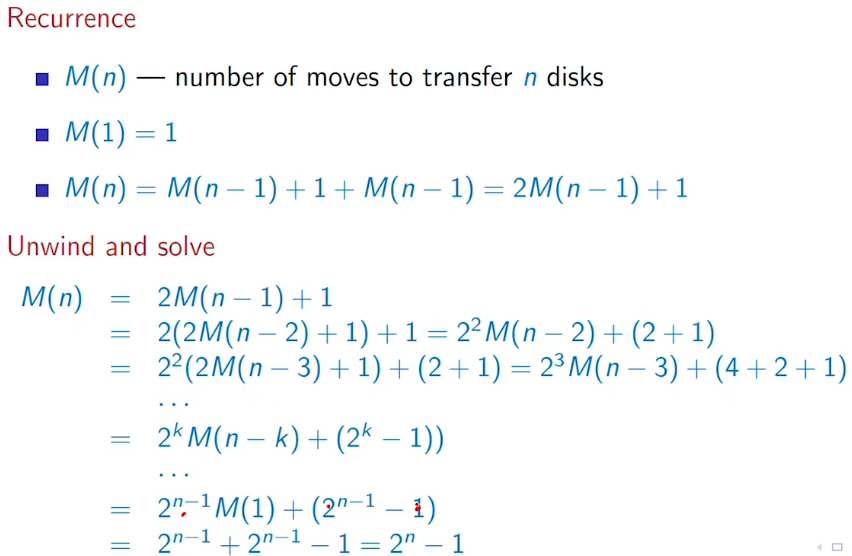

In [ ]:
def pm(s,e):
  print (s, "---->",e)

def hanoi(n,start,end):
  if n == 1:
    pm(start,end)
  else:
    other = 6 - (start + end)
    hanoi(n-1,start,other)
    pm(start,end)
    hanoi(n-1,other,end)

In [ ]:
hanoi(4,1,3)

1 ----> 2
1 ----> 3
2 ----> 3
1 ----> 2
3 ----> 1
3 ----> 2
1 ----> 2
1 ----> 3
2 ----> 3
2 ----> 1
3 ----> 1
2 ----> 3
1 ----> 2
1 ----> 3
2 ----> 3


# Searching/sorting Algo

Set Recurance limit to max

In [ ]:
import sys
sys.setrecursionlimit(2**31-1)

In [ ]:
#Normal search

def search(lst,x):
  (Flag,index)=(False,-1)
  for i in range(len(lst)):
    if lst == x:
      index = i
      Flag = True
      break

  if Flag:
    return index
  else:
    return Flag

In [ ]:
#binary search

def b_search(lst,x):
  half = len(lst/2)

  if lst == []:
    return False

  if lst[half] == x:
    return True

  if x < lst[half]:
    return (b_search(lst[:half],x))          #goes from 0 to half - 1
  else:
    return (b_search(lst[half+1:,x]))        #goes from half + 1 to end

For the
* Normal search $O(n)$


```
over here the worst case is element not being present
therefore going and checking thw whole list
```


* Binary search $O(log(n))$



```
Over here worst case is again element not being present
however we half the length of list every iteration
((n//2)//2)//2 ...log(n) times.. till we get 1
```

**Recurrance for binary search**
for $T(n)$ viz recurrance (only for recrusive algo)
* $T(0) = 1$
* $T(n) = T(n//2) + 1$

By unwinding <br>


\begin{align}
T(n) &= T(n//2)+1 \\
&= (T(n//4) +1)+1 = T(n//2^2) + 2 \\
&=  ... \\
&= T(n//2^k) + k\\
&= T(1) + k \text{ now here } k = log(n)\\
&= T(0) +1+log(n)\\
&= 2+ log(n)
\end{align}

Note how we got a good precise answer which also accounts for trivial cases (+2) and the overall time

**Sorting a list**
Useful for
1. Binary search
2. Finding Median
3. Checking Duplicates
4. Making frequency table


###1. **Selection sort**

In [ ]:
def selection_sort(lst):
  l=len(lst)
  if (l < 2):
    return lst
  for i in range(l-1):
    min_pos = i
    for j in range(i+1, l):
      if lst[min_pos]>lst[j]:
        min_pos = j
    (lst[i],lst[min_pos])=(lst[min_pos],lst[i])
  return lst


In [ ]:
print(selection_sort([3,2,1,2,3,4,5]))

[1, 2, 2, 3, 3, 4, 5]


\begin{align}
&(n-1) + (n-2) +(n-3)\\
&\implies \frac{n.(n-1)}{2}
\end{align}

The above sorting is $O(n^2)$ all the time as this always checks through the whole list.



---



###**Insertion sort**<br>
Basic premis is
1. add paper to new pile
2. Insert the next paper so that the pile remains sorted
3. repeat till all the papers have been transfered from one pile to the next


However the above can be done insitu/inplace
1. Assume 0 to i-1 is sorted
2. insert i in the sorted part of list by checking the it with the elements in that sorted part of the list


think of it like a backward check, in selection sort we get the element to be added to the sortedd part by performing checks on the unsorted forward side while in insertion sort the ith elemment is checked and inserted in the backward sorted part.Therefore it is a bit faster for kindof sorted data as lesser



In [ ]:
def InsertionSort(lst):
  l = len(lst)
  if l < 1:
    return(lst)
  for i in range(l):
    j=i                                             #to extend the boundry

    while(j>0 and lst[j] < lst[j - 1]):             #swaps till appropriate place is found

      (lst[j],lst[j-1]) = (lst[j-1],lst[j])         #loop stops as soon as the appropriate position is found
      j-=1
  return (lst)

Recrusive version of insertion sort

In [ ]:
def Iinsert(lst, v):
  l=len(lst)
  if l == 0:
    return([v])                                   #recursive base case if we reach the end of the list(when val is smallest in the sorted side)
  if (v>=lst[-1]):
    return(lst + [v])                             #recrusive base case when proper position is found
  else:
    return (Iinsert(lst[:-1],v) + l[-1])          #this is like recurrsive swapping
def Isort(lst):
  l = len(lst)
  if l<1:
    return lst
  lst = Iinsert(Isort(lst[:-1]),lst[-1])
  return lst

* for the loop version
we can see that we first compare the first element with none, then second with first then third with second and first and so on so
\begin{align}
 T(n) &= 0+1+2+3 ...+(n-1)\\
 &= \frac{n(n-1)}{2}\\
 T(n) &\text{ is }O(n^2)
\end{align}

<br>

* For the recrusive version

Let $TI(n)$ be the time taken by Iinsert

let $TS(n)$ be the time taken by Isort

\begin{align}
\\ TI(0)&=1
\\ TI(n)&=TI(n-1) + 1
\\ &=TI(n-2) + 1 + 1
\\ &...
\\ &=TI(0) + (1+1+... n-1\text{ times })
\\ TI(n) &= n
\\
\\ \text{Now for recurrance of } TS(n)
\\TS(0) &= 1 \\
\\ TS(n) &= TS(n-1) + TI(n-1)
\\ &= TS(n-2) + n-1
\\ &= TS(n-3) + (n-1) + (n-2)
\\&...
\\ TS(n) &=1 + 2 + ... +(n-3)+(n-2)+(n-1)
\\ &= \frac{n(n-1)}{2}
\end{align}

Therefor we get the same $O(n^2)$ for the recrusive one



---



###**Merge Sort**

* the merge function takes two sorted list and merges/interlaces them

In [ ]:
def mmerge(a,b):
  '''
  a:sorted list
  b:sorted list
  '''
  print (a,b)
  #l1 and l2 store the total length of the two segments a and b
  (l1,l2) = (len(a),len(b))

  #c is the final merged list
  #p1 is like a poiner to a segment to be compared
  #p2 is same but for segment b
  #k is the total progress/length of merged list
  (c,p1,p2,k)=([],0,0,0)


  while (k<=p1+p2):
    #boundry condition when one segment has been appended,
    #the other segment is extended to merged list as no comparison are now required

    if p1 == l1:
      c.extend(b[p2:])
      k+= l2 - p2   #add the remaing length
    elif p2 == l2:
      c.extend(a[p1:])
      k+=l1 - p1    #add the remaining length

    #for checking the top of the segment/stack
    elif a[p1]<b[p2]:
      c.append(a[p1])
      (p1,k)=(p1+1,k+1)
    else:
      c.append(b[p2])
      (p2,k)=(p2+1,k+1)

  return c

In [ ]:
def merge_sort(lst):
  l=len(lst)
  print (lst,end = '1st \n')
  if(l <= 1):
    return lst
  left_lst = merge_sort(lst[:l//2])
  right_lst = merge_sort(lst[l//2:])

  ans_lst = mmerge(left_lst,right_lst)
  return ans_lst

In [ ]:
def merge(arr, left, mid, right):
    n1 = mid - left + 1
    n2 = right - mid
    L = arr[left:mid + 1]
    R = arr[mid + 1:right + 1]

    i = j = 0
    k = left

    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

def ittr_merge_sort(lst):
  n=len(lst)
  w_s=1
  l_i =0
  ans=[]
  while(w_s<=n):
    print (w_s)
    for i in range(0,n,w_s*2):
      mid = min(i+w_s -1,n-1)
      end = min(i+w_s*2 - 1,n-1)
      merge(lst,i,mid,end)
    w_s*=2
  return lst

In [ ]:
ittr_merge_sort([9,8,7,6,5,4,3,2,1])

1
2
4
8


[1, 2, 3, 4, 5, 6, 7, 8, 9]

Lets try to get time complexity by using recrusive solution

**Merge function**
\begin{align}
T(n) &= max(m,n)\\
&\text{Assuming it to mostly be of equal length list}\\
T(n)&=n
\end{align}
**For mergesort function**
\begin{align}
T(0) &= 1
\\T(1) &= 1
\\T(n) &= 2T(n/2) + n
\\ \implies T(n) &= 2[2T(n/4) + n/2]+n = 2^2T(n/2^2) + 2n
\\ \implies T(n) &= 2^3T(n/2^3)+3n\\
\\ &...\\
\\ \implies T(n) &= 2^kT(n/2^k) + kn\\
\\ \text{When }k &=\log_2(n)\\T(n/2^k) &= T(1) = 1\\
\\ \implies T(n) &= 2^{\log_2n}T(1) + (log_2(n))n = n + n\log_2(n)\\
\\\text{as }n\log_2n &> n\\
\\\text{hence } T(n) \text{ has }O(n\log_2n)
\end{align}


---



###Quick Sort

In [ ]:
def pivot_partition(lst,left,right):
  if (right - left <= 1):
      return lst
  #only lower bound needds to be kept track of
  lb = left
  for i in range(left+1,right):
    if lst[left]>lst[i]:
      lst[lb+1],lst[i] = lst[i],lst[lb+1]
      lb+=1
  lst[lb],lst[left] = lst[left],lst[lb]

  pivot_partition(lst,left,lb)
  pivot_partition(lst,lb+1,right)


In [ ]:
def pivot_partition(lst,left,right):
  #only lower bound needds to be kept track of
  lb = left
  for i in range(left+1,right+1):
    if lst[left]>lst[i]:
      lst[lb+1],lst[i] = lst[i],lst[lb+1]
      lb+=1
  lst[lb],lst[left] = lst[left],lst[lb]
  return lb

def ittr_quick_sort(lst):
  stack = []
  stack.append(0)
  stack.append(len(lst)-1)
  while stack:
    right =  stack.pop()
    left = stack.pop()
    p = pivot_partition(lst,left,right)
    if left<p:
      stack.append(left)
      stack.append(p-1)
    if p+1<right:
      stack.append(p+1)
      stack.append(right)



**Analysis of quick sort**<br>
It is trivial  that partitioning wrt pivot takes $O(n)$ time as we itterate through the list and partition arround the pivot

if the pivot is median $$\\T(n) = 2T(n/2) +n\\T(n) \text{ is } O(n\log n) \\\text{ as partiting is always from the mid}$$

However This is the best case,
in worst case the pivot is either max or min<br>
worst case list is an ordered list
\begin{align}
\\T(n) &= T(n-1) + n
\\T(n) &= n+(n-1)+ ... +1
\\T(n) &\text{ is } O(n^2)\\
\\\text{The average case is }&O(n\log n)
\\
\\\text{However we generally expect }n\log(n)
\\
\\\text{Another way people get around malicious worst case is by taking a random
 pivot rather than start, ofcourse the worst case still exists
 but the permutation of worst pivot changes with each itteration}
\end{align}


In [ ]:
lst = [ 3,5,1,2,8,3,1]
pivot_partition(lst,0,len(lst))
print(lst)

[1, 1, 2, 3, 3, 5, 8]


**STABILITY OF A SORTING**

If we are sorting an attribute of a tuple

then sorting of a coulumn B does not disturbe the sorting of column A i.e the later sorting does not affect earlier sorting when similar later sorted attributes are considered.This type of a sort is a stable sort

* Quick sort is not stable
* Merge sort is stable if we give more preference to the left when same attributes occure


# Storage methods

1. List
* Have Flexible length
* Easy to modify
* Value scattered in memory

2. Array
* Fixed size
* Memory as contageous blocks of memory
* Random access and modification is avalable
* eg. for storage of adjacency matrix to repesent a graph
* due to contageous nature of memory blocks the acess to elements in an array is faster than a list.



Linked lists

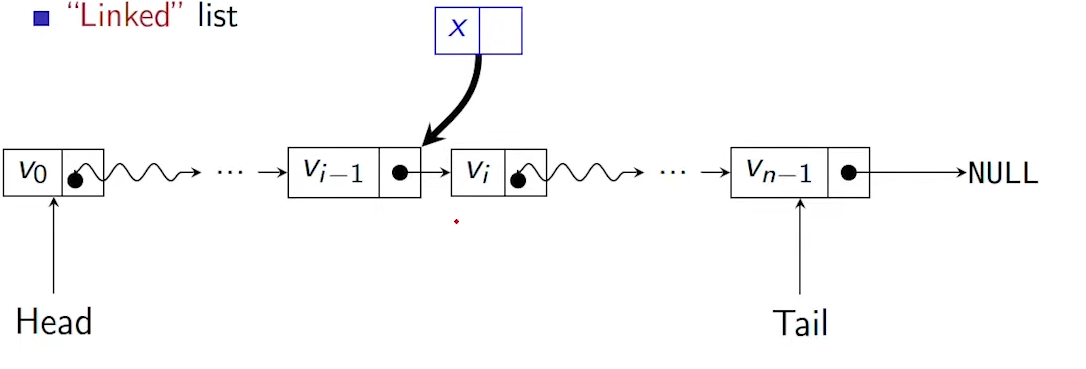

1. Easy to modify
2. Flexible size
3. Howeve r must wlak down the list to access the ith element ergo. takes $O(i)$ to access the $ith$ element

---

###Array

1. **contageous storage**
* known for n * sizeof(datatype) size


2. **Random access**
* random access with $O(1)$ access time as the $ith$ element is just

$$\text{initial data address} + i×\text{sizeof(d.type)} \\
\\
\\i.e. \text{in pointer arithametic } ptr + i$$

3. **Expensive edits**
* adding/inserting/deleting values requires us to shift everything after so $O(n)$ in worst case

OPERATIONS

1. Exchange A[i] and A[j]
* constant time for array as access is arithametic and in constant time
* $O(n)$ for lists as we need to traverse through the entire list.

Making linked list in python

1. Constructor
* value is the value of the current node
* next is the value of the next node

2. isempty
* checks whether the value is None or not

3. append
* **when the value is empty** *so the list is empty, we allocate value v to the node value*

* **When the value is not empty but there is no next**: we create a new node with value V and make the next point to the new node

* **If both next and value have a value and a pointer**: Then we go through the linked list till we reach the end of the list

* Essentially,

```
if self.next == none
  self.next = node (v)
```
is the base case for the recrusion



In [ ]:
class node:
  def __init__(self,v = None):
    self.value = v
    self.next = None

  def isempty(self):
    if self.value == None:
      return(True)
    else:
      return (False)
  # Recrusive Implementation
  '''
  def append(self,v):
    if self.isempty():
      self.value = v
    elif self.next == None:
      self.next = node(v)   #constructor to call to create new node
    else:
      self.next.append(v)   #Recursive call to reach the end off the linked list
    return
  '''
  # Itterative implementation
  def append(self,v):
    if self.isempty():
      self.value = v
      return
    temp = self
    while temp.next != None:
      temp = temp.next
    #now temp has the reference of last node
    temp.next = node(v)
    return

  def insert(self,v):
    if self.isempty():
      self.value = v
      return

    newnode = node(v)

    (self.value,newnode.value) = (newnode.value, self.value)

    (self.next, newnode.next) = (newnode,self.next)

    return

  def delete(self,v):
    if self.isempty():
      return
    if self.value == v:
      if self.next != None:
        self.value = self.next.value
        self.next = self.next.next
      return
    else:
      if self.next != None:
        self.next.delete(v)
        if self.next.value == None:
          self.next = None
    return




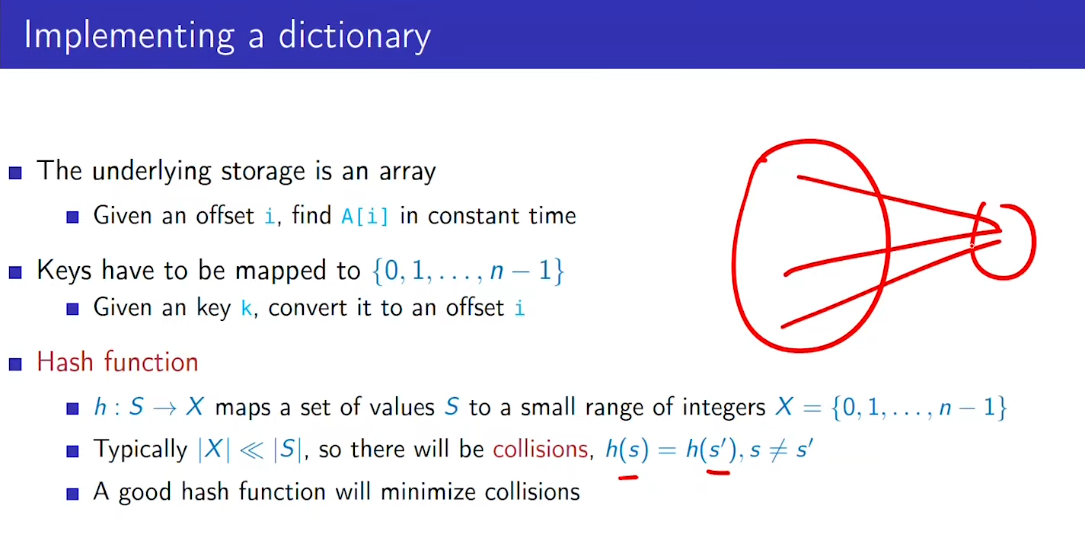

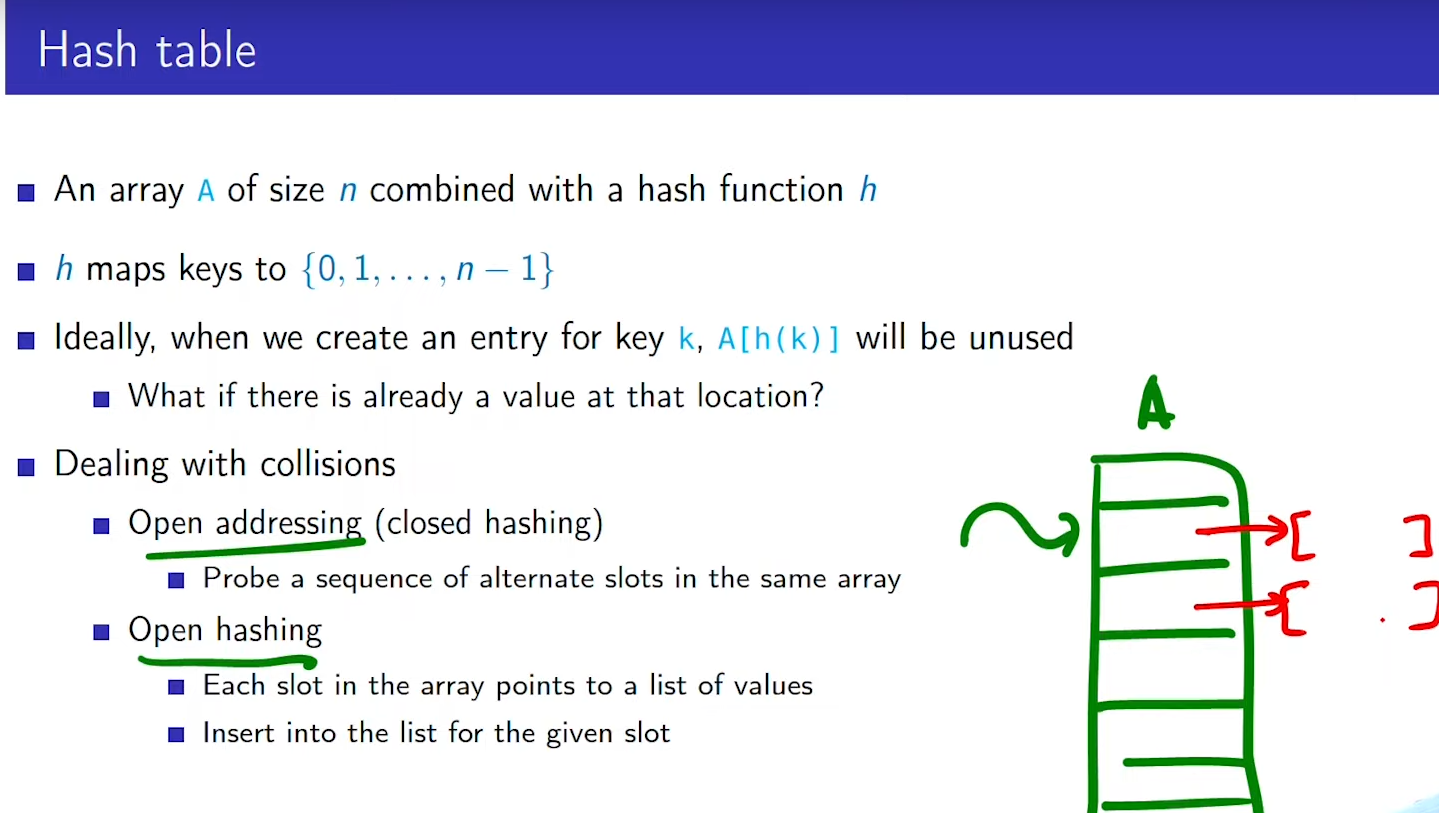

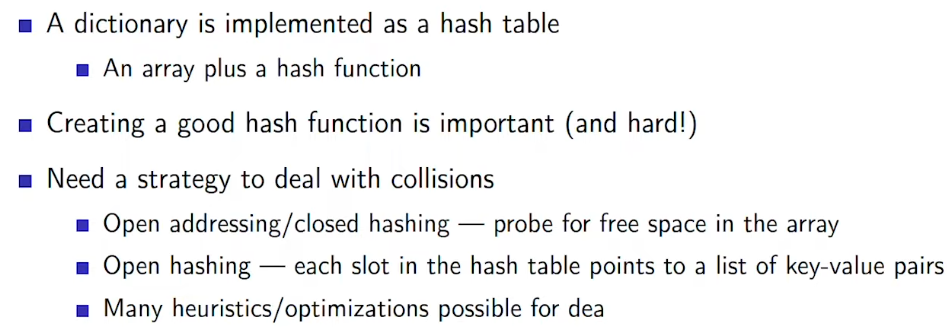

#Graph Theory

###**Adjacency matix/list**

used to store a graph

problem: get the neighbour of ith node

In [ ]:
def neighbours(adj, i):
  nbr=[]
  (row,col) = adj.shape
  for j in range(col):
    if adj[i,j] == 1:
      nbr.append(j)
  return(nbr)

In [ ]:
def adj_lst(adj):
  adj_lst = {}
  for i in range(len(adj)):
    adj_lst[i]=[]
    adj_lst[i].extend(neighbours(adj,i))
  return(adj_lst)


In [ ]:
import numpy as np
adj =  np.array([[0,1,0,1,0],[1,0,1,0,1],[0,1,0,1,0],[1,0,1,0,1],[0,1,0,1,0]])
print(neighbours(adj,1))
print(adj_lst((adj)))

[0, 2, 4]
{0: [1, 3], 1: [0, 2, 4], 2: [1, 3], 3: [0, 2, 4], 4: [1, 3]}


Making a calss queue which follows a first in first out polocy

In [ ]:
class Queue:
  def __init__(self):
    self.q = []

  def enqueue(self,val):
    self.q.append(val)

  def enlist(self,lst):
    self.q.extend(lst)

  def peek(self):
    return(self.q[0])

  def dequeue(self):
    try:
        return(self.q.pop(0))
    except(IndexError):
        return (None)

  def isempty(self):
    return(self.q == [])

  def __str__(self):
    return (str(self.q))

  def get_q(self):
    return (self.q)

  def at(self,i):
    return(self.q[i])

  def __len__(self):
    return(len(self.q))


Testing the overengenered q

In [ ]:
test = Queue()
test.enqueue(1)
test.enqueue(2)
test.enqueue(3)
print(test.get_q())
l=test.dequeue()
print(l)
print(test.peek())
print(test.get_q())

[1, 2, 3]
1
2
[2, 3]


In [ ]:
def bfs(adj,v):
  (rows,cols)= adj.shape

  visited = {}

  for i in range(rows):
    visited[i] = False

  visited[v] = True
  q = Queue()
  q.enqueue(v)

  while (not q.isempty()):
    print(q.get_q())
    exp= q.dequeue()

    for i in neighbours(adj,exp):
      if (not visited[i]):
        visited[i] = True
        q.enqueue(i)

  return(visited)

In [ ]:
import numpy as np
adj =  np.array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
print(adj_lst(adj))
print(bfs(adj,7))

{0: [1, 2, 4], 1: [0, 2], 2: [0, 1], 3: [4, 5, 6], 4: [0, 3, 7], 5: [3, 6, 7, 8], 6: [3, 5], 7: [4, 5, 8], 8: [5, 7, 9], 9: [8]}
[7]
[4, 5, 8]
[5, 8, 0, 3]
[8, 0, 3, 6]
[0, 3, 6, 9]
[3, 6, 9, 1, 2]
[6, 9, 1, 2]
[9, 1, 2]
[1, 2]
[2]
{0: True, 1: True, 2: True, 3: True, 4: True, 5: True, 6: True, 7: True, 8: True, 9: True}


###**Analysis of BFS on adjacency matrix**

\begin{align}
\\ &\text{Suppose a graph }
\\&G =(v,e)
\\&\text{Where V is the set of vertex and E is a bianry relation and represents set of edges viz }\\
\\&eϵ ℝ \times ℝ
\end{align}


now suppose that
$|v| = n$ and $|e| = m$ viz. no of vertex and edges respectively

if the graph is connected $m$ varies from $n-1$ to $\frac{n(n-1)}{2}$

for adjacency matrix each vertex is first visited once and then enqueued only once.$n$


Each of these enqueued element is dequeued only once and used on the neighbour function which must also go through all columns of adjacency matrix i.e. another $n$ times


***in a nutshell n times to enqueue***
***and n times to explore the dequeued element***


Therefore for this adjacency matrix we have a $O(n^2)$


**Analysis of BFS on adjacency list**

We know that the neighbour function gets is not required and we get the neighbours directly in an adjacency list

However each one of these variable length list needs to be compared to the visited dictionary which makes the comparison a bit harder

lets note few property of graph first

The sum of all the degreess of the non directed draph adds up to $2m$ as each node is entered and exited adding thaat degree of 2

ergo sum of degreess is 2m

time to explore $i$ it degree of $i^{th}$ node

therefor each edge $(i,j)$ contribute to degree of $i$ and degree $j$

so on combining thee above we can see thet even though each step time cannot be known the sum of all the time is known and is $2m$

so it takes

$2m$ to enlist each vertex/ explore / get neighbours of each node

$n$ steps to go through/dequeue each element

so overall time is $O(n+m)$


Note that $m << n^2$ as we usually dont deaal with dense graphs

For graphs, $O(m+n)$ is usually near optimal

needs to see every edge and vertex atleasat once


####Recovering Path from BFS

In [ ]:
def path_dic_bfs(adj_lst,v):
  l_path,visited = {},{}
  for i in adj_lst:
    visited[i] = False
    l_path[i] = None

  q = Queue()
  q.enqueue(v)
  visited[v]=True

  while (not q.isempty()):
    exp = q.dequeue()
    for i in adj_lst[exp]:
      if (not visited[i]):
        visited[i] = True
        q.enqueue(i)
        l_path[i] = exp

  return (visited,l_path)


Lets optimise the usuage of the dictionary, lets keep the distance/level instead of is visited

In [ ]:
def path_level_bfs(adj_lst,v):
  l_path,level={},{}
  for i in adj_lst:
    l_path[i] = None
    level[i] = -1

  q=Queue()
  q.enqueue(v)
  level[v] = 0

  while (not q.isempty()):
    exp = q.dequeue()
    for i in adj_lst[exp]:
      if level[i] == -1:
        level[i] = level[exp] + 1
        q.enqueue(i)
        l_path[i] = exp

  return (l_path,level)

In [ ]:
a={0: [1, 2, 4], 1: [0, 2], 2: [0, 1], 3: [4, 5, 6], 4: [0, 3, 7], 5: [3, 6, 7, 8], 6: [3, 5], 7: [4, 5, 8], 8: [5, 7,9], 9: [8]}
print(path_level_bfs(a,7))

({0: 4, 1: 0, 2: 0, 3: 4, 4: 7, 5: 7, 6: 5, 7: None, 8: 7, 9: 8}, {0: 2, 1: 3, 2: 3, 3: 2, 4: 1, 5: 1, 6: 2, 7: 0, 8: 1, 9: 2})


Stacks

no need recrusive calls have an implicit stack

In [ ]:
visited,parent = {},{}
def dfsinnit(adj_lst):
  for i in adj_lst:
    visited[i] = False
    parent[i] = -1
  return

def dfs(adj_lst,v):
  visited[v] = True

  for i in adj_lst[v]:
    if not visited[i]:
      parent[i] = v
      dfs(adj_lst,i)

  return

In [ ]:
#dfs non global bs

def dfsinnit(adj):
  (rows,cols) = adj.shape
  visited,parent = {},{}
  for i in range(rows):
    visited[i] = False
    parent[i] = -1
  return (visited,parent)

def dfs(adj,visited,parent,v):
  visited[v] = True
  n_list = neighbours(adj,v)
  for i in n_list:
    if not visited[i]:
      parent[i] = v
      visited,parent = dfs(adj,visited,parent,i)      #for penetrating deeper into grapph

  return (visited,parent)   #responsible for back tracking

### Identifing the connected componentss

####BFS Implementation

In [ ]:
def keys(dic):
  return([i for i in dic])

In [ ]:
def bfs(adj,v):

  visited = {}

  for i in adj:
    visited[i] = False

  visited[v] = True
  q = Queue()
  q.enqueue(v)

  while (not q.isempty()):
    print(q.get_q())
    exp= q.dequeue()

    for i in adj[exp]:
      if (not visited[i]):
        visited[i] = True
        q.enqueue(i)

  return(visited)

def component(A_list):
  component_no=0    #stores component number
  comp_dic={}       #stores the vertex component belonging
  #initilises the comp_dic
  for i in A_list:
    comp_dic[i] = None

  v_checked = 0           #stores the number of vertex checked
  nodes = A_list.keys()   #stores all the nodes/vertex in graph
  while v_checked <= max(nodes):        #runs while all nodes are not checked
    #vertex to be checked is the vertex with least node no and no component number
    start_vertex = min([i for i in nodes if comp_dic[i] == None])

    #dic to store which vertexes were visited/commeccted from the start vertex
    visited = bfs(A_list,start_vertex)

    #to lable each vertex component based on connectedness
    for i in visited:
      if visited[i]:
        comp_dic[i] = component_no
        v_checked +=1

    #ne componenent no for next itteration
    component_no+=1
  return comp_dic

#### DFS Numbering

We are searching for non trivial cycles

viz an edge itself is not a a cycle

**Simple cycle**: Do not repeat a vertex

**Acyclic graph**: Graph with no cycles

In [ ]:
visited,pre,post = {},{},{}

def dfsinnit(alist):
  '''
  Initialisation of the
  visited,
  pre,
  post dictionary by vertex names
  '''
  for i in alist:
    (visited[i],pre[i],post[i]) = (False,-1,-1)
  return

def dfsprepost(alist,v,count):
  '''
   set visited to be true and
   as we are decending( func call only once pre vertex)
   we set pre value
  '''
  visited[v],pre[v] = True,count
  #count increment
  count+=1
  for i in alist[v]:
    if not visited[i]:
      #function call for further decent, we set count based on count after decent
      count = dfsprepost(alist,i,count)
  #executes during ascent so this time vertex post is set
  post[v] = count
  #acent count increment
  count+=1
  return count


alist= {0:[1,2,5],
        1:[4],
        2:[3],
        3:[0],
        4:[5,6,7],
        5:[7],
        6:[7],
        7:[]
        }
dfsinnit(alist)
dfsprepost(alist,0,0)

def print_dic(d1,d2):
  print('vertex\t\tpre\t\tpost')
  for i in d1:
    print (i,d1[i],d2[i],sep = '\t:\t')

print_dic(pre,post)

vertex		pre		post
0	:	0	:	15
1	:	1	:	10
2	:	11	:	14
3	:	12	:	13
4	:	2	:	9
5	:	3	:	6
6	:	7	:	8
7	:	4	:	5


In [ ]:
def indegree(adj):
  '''
  Takes the adjacency matrix
  Returns the indegree dictionary
  '''
  row,col = adj.shape
  dic = {}
  for i in range(row):
    dic[i] = 0
  for c in range(col):
    for r in range(row):
      if adj[r,c] == 1:
        dic[i]+=1
  return dic


def toposort(adj):
  sorted = []
  indeg = indegree(adj)
  (row,col) = adj.shape

  for i in range(row):
    #to be added
    tba = min([j for j in range(row) if indeg[j] == 0])
    sorted.append(tba)
    #to remove the vertex for further checks
    indeg[tba] = -1
    #loop through the tba column to decrease the indegree of
    #connected vertex
    for j in range(col):
      if adj[tba,j] == 1:
        indeg[j] -=1

  return(sorted)




Using adjacency list

In [ ]:
def indegree(a_lst):
  dic = {}
  for i in a_lst:
    dic[i]=0

  for i in a_lst:
    for j in a_lst[i]:
      dic[j]+=1

  return dic

def toposort(a_lst):
  sorted = []
  indeg = indegree(a_lst)

  zero_deg_q = Queue()
  zero_deg_q.enlist([i for i in indeg if indeg[i] == 0])

  while (not zero_deg_q.isempty()):
    tba = zero_deg_q.dequeue()
    sorted.append(tba)
    indeg[tba] -=1

    for i in a_lst[tba]:
      indeg[i]-=1
      if indeg[i] == 0:
        zero_deg_q.enqueue(i)

  return (sorted)



###Longest Path

In [ ]:
def indegree(a_lst):
  dic={}

  for i in a_lst:
    dic[i] = 0

  for i in a_lst:
    for j in a_lst[i]:
      dic[j]+=1

  return dic

def longest_path(a_lst):
  indeg = indegree(a_lst)
  l_path = {}
  for i in a_lst:
    l_path[i] = 0
  zero_deg_q = Queue()

  zero_deg_q.enlist([i for i in indeg if indeg[i] == 0])

  while(not zero_deg_q.isempty()):
    j = zero_deg_q.dequeue()
    indeg[j]-=1
    for i in a_lst[j]:
      indeg[i]-=1
      l_path[i] = l_path[j]+1 if l_path[j]+1 > l_path[i] else l_path[i]
      if indeg[i] == 0:
        zero_deg_q.enqueue(i)
  return l_path

In [ ]:
a={0: [2,3,4], 1: [2,7], 2: [5], 3: [5, 7], 4: [7], 5: [6], 6: [7], 7: []}
print(toposort(a))
print(longest_path(a))

[0, 1, 3, 4, 2, 5, 6, 7]
{0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 2, 6: 3, 7: 4}


####Weighted Graphs

#####Shortest Path

**Single source shortest path**

# Dijkstra's Algorithm Time Complexity Analysis

Dijkstra's algorithm is a classic algorithm used to find the shortest path from a single source node to all other nodes in a weighted graph. The time complexity of Dijkstra's algorithm depends heavily on the data structure used to implement the priority queue.

## Algorithm Overview

1.  **Initialization:**
    * Set the distance to the source node to 0 and the distance to all other nodes to infinity.
    * Create a priority queue (min-heap) containing all nodes.

2.  **Iteration:**
    * While the priority queue is not empty:
        * Extract the node with the minimum distance (current node).
        * For each neighbor of the current node:
            * Calculate the distance to the neighbor through the current node.
            * If this distance is less than the current distance to the neighbor, update the neighbor's distance and update its priority in the queue.

## Time Complexity Analysis

The time complexity of Dijkstra's algorithm can be broken down into the following components:

### 1. Initialization

* Setting initial distances: O(V), where V is the number of vertices.
* Building the priority queue:
    * Using an array: O(V)
    * Using a binary heap: O(V)
    * Using a Fibonacci heap: O(V)

### 2. Iteration

* **Extracting the minimum:** This operation is performed V times.
    * Array: O(V) per extract, so O(V^2) total.
    * Binary heap: O(log V) per extract, so O(V log V) total.
    * Fibonacci heap: O(log V) per extract, so O(V log V) total.
* **Updating distances and priorities:** This operation is performed at most E times, where E is the number of edges.
    * Array: O(1) per update, so O(E) total.
    * Binary heap: O(log V) per update, so O(E log V) total.
    * Fibonacci heap: O(1) amortized per update, so O(E) total.

### Overall Time Complexity

* **Array:** O(V^2 + E) = O(V^2) (since E <= V^2)
* **Binary Heap:** O(V log V + E log V) = O((V + E) log V). In a connected graph, E >= V-1, so this is often simplified to O(E log V). If the graph is dense, where E is close to V^2, then the time complexity becomes O(V^2 log V).
* **Fibonacci Heap:** O(V log V + E). This is the asymptotically fastest implementation, especially for sparse graphs where E is much smaller than V^2.

### Summary Table

| Data Structure   | Extract Min | Update Priority | Total Time Complexity |
| :--------------- | :---------- | :-------------- | :-------------------- |
| Array            | O(V)        | O(1)            | O(V^2)                |
| Binary Heap      | O(log V)    | O(log V)        | O(E log V)            |
| Fibonacci Heap | O(log V)    | O(1) (amortized) | O(V log V + E)        |

### Conclusion

The choice of data structure significantly impacts the performance of Dijkstra's algorithm. For dense graphs, an array-based implementation might be sufficient. However, for sparse graphs, using a binary heap or, even better, a Fibonacci heap, provides significant performance improvements. In most practical scenarios, a binary heap is a good compromise between performance and implementation complexity.

In [ ]:
import numpy as np

def dijkstra(WA_mat,v):
  (rows,col,t) = WA_mat.shape
  inf = np.inf
  (visited,distance)=({},{})
  #Initialisation of visited and distance
  for i in range(len(WA_mat)):
    visited[i] = False
    distance[i] = inf

  #Setting start to be 0
  distance[v] = 0

  #values non critical as this loop itterates till the worst case and will terminatte by break
  for _ in range(rows):

    #Implementation of greedy selection

    #get the min distance
    nextDistance = min([distance[i] for i in distance if not visited[i]])
    print([(i,distance[i]) for i in distance if not visited[i]])
    #get the vertex list of with minimum distance
    nextVertexList = [i for i in range(rows)
    if ((distance[i] == nextDistance) and (not visited[i]))]

    #Breaaks if there is no vertex with minimum distance
    if nextVertexList == []:
      break


    #selects the next vertex from the list based on min vertex number
    nextVertex = min(nextVertexList)

    #Visiting the next vertex
    visited[nextVertex] = True


    #Loop to check the neighbours of next vertex
    for j in range(col):

      #contidition for updation of next vertex neighbour
      if ((not visited[j]) and WA_mat[nextVertex,j,0] == 1):

        #set the distance of next vertex why checking minimum between the durrent known distance
        #and potential new distance
        distance[j] = min(distance[j],distance[nextVertex]+WA_mat[nextVertex,j,1])

  return distance






arr=np.array([
    [(0, 0), (1, 10), (1, 80), (0, 0), (0, 0), (0, 0), (0, 0)],
    [(1, 10), (0, 0), (1, 6), (0, 0), (1, 20), (0, 0), (0, 0)],
    [(1, 80), (1, 6), (0, 0), (1, 70), (0, 0), (0, 0), (0, 0)],
    [(0, 0), (0, 0), (1, 70), (0, 0), (0, 0), (0, 0), (0, 0)],
    [(0, 0), (1, 20), (0, 0), (0, 0), (0, 0), (1, 50), (1, 5)],
    [(0, 0), (0, 0), (0, 0), (0, 0), (1, 50), (0, 0), (1, 10)],
    [(0, 0), (0, 0), (0, 0), (0, 0), (1, 5), (1, 10), (0, 0)]
])

print(dijkstra(arr,0))

[(0, 0), (1, inf), (2, inf), (3, inf), (4, inf), (5, inf), (6, inf)]
[(1, 10), (2, 80), (3, inf), (4, inf), (5, inf), (6, inf)]
[(2, 16), (3, inf), (4, 30), (5, inf), (6, inf)]
[(3, 86), (4, 30), (5, inf), (6, inf)]
[(3, 86), (5, 80), (6, 35)]
[(3, 86), (5, 45)]
[(3, 86)]
{0: 0, 1: 10, 2: 16, 3: 86, 4: 30, 5: 45, 6: 35}


In [ ]:
import numpy as np
def dijkstra(WA_lst,v):
  distance = {}
  visited = {}

  for i in WA_lst:
    distance[i] = np.inf
    visited[i] = False

  distance[v] = 0

  for temp in WA_lst:
    nextDistance = min([distance[i] for i in WA_lst if (not visited[i])])
    nextVertexList = [i for i in distance
                      if ((not visited[i]) and (distance[i]==nextDistance))]

    if nextVertexList == []:
      break

    nextVertex = min(nextVertexList)
    visited[nextVertex] = True

    for j in WA_lst[nextVertex]:
      if (not visited[j[0]]):
        distance[j[0]] = min(distance[j[0]],distance[nextVertex]+ j[1])


  return distance

adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(0, 10), (2, 6), (4, 20)],
    2: [(0, 80), (1, 6), (3, 70)],
    3: [(2, 70)],
    4: [(1, 20), (5, 50), (6, 5)],
    5: [(4, 50), (6, 10)],
    6: [(4, 5), (5, 10)]
}

print(dijkstra(adjacency_list,0))


{0: 0, 1: 10, 2: 16, 3: 86, 4: 30, 5: 45, 6: 35}


Using Bellman Ford Algorithm
* Can be used for graphs with negative weights
* cannot be used for graphs with negative cycles

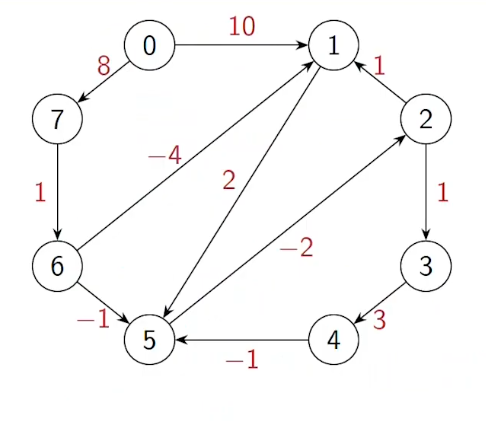

In [ ]:
import numpy as np
def bellFA(WMat,v):
  distance = {}
  (rows,cols,x)=WMat.shape
  for i in range(rows):
    distance[i] = np.inf
  distance[v] = 0
  print (distance)
  for i in range(rows):
    print('i = ',i)
    print(distance)
    for j in range(rows):
      for k in range(cols):
        if WMat[j,k,0] == 1:
          distance[k] = min(distance[k],distance[j]+WMat[j,k,1])
  return distance

adjMat = np.array([
    [(0, 0),  (1, 10), (0, 0),  (0, 0), (0, 0), (0, 0),  (0, 0), (1, 8)],
    [(0, 0),  (0, 0),  (0, 0),  (0, 0), (0, 0), (1, 2),  (0, 0), (0, 0)],
    [(0, 0),  (1, 1),  (0, 0),  (1, 1), (0, 0), (0, 0),  (0, 0), (0, 0)],
    [(0, 0),  (0, 0),  (0, 0),  (0, 0), (1, 3), (0, 0),  (0, 0), (0, 0)],
    [(0, 0),  (0, 0), (0, 0),  (0, 0), (0, 0), (1, -1), (0, 0), (0, 0)],
    [(0, 0),  (0, 0),  (1, -2),  (0, 0), (0, 0), (0, 0),  (0, 0),(0, 0)],
    [(0, 0),  (1, -4), (0, 0),  (0, 0), (0, 0), (1, -1),  (0, 0), (0, 0)],
    [(0, 0),  (0, 0),  (0, 0),  (0, 0), (0, 0), (0, 0),  (1, 1), (0, 0)]
])

print(bellFA(adjMat,0))

{0: 0, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 6: inf, 7: inf}
i =  0
{0: 0, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 6: inf, 7: inf}
i =  1
{0: 0, 1: 10, 2: 10, 3: inf, 4: inf, 5: 12, 6: 9, 7: 8}
i =  2
{0: 0, 1: 5, 2: 10, 3: 11, 4: 14, 5: 8, 6: 9, 7: 8}
i =  3
{0: 0, 1: 5, 2: 5, 3: 11, 4: 14, 5: 7, 6: 9, 7: 8}
i =  4
{0: 0, 1: 5, 2: 5, 3: 6, 4: 9, 5: 7, 6: 9, 7: 8}
i =  5
{0: 0, 1: 5, 2: 5, 3: 6, 4: 9, 5: 7, 6: 9, 7: 8}
i =  6
{0: 0, 1: 5, 2: 5, 3: 6, 4: 9, 5: 7, 6: 9, 7: 8}
i =  7
{0: 0, 1: 5, 2: 5, 3: 6, 4: 9, 5: 7, 6: 9, 7: 8}
{0: 0, 1: 5, 2: 5, 3: 6, 4: 9, 5: 7, 6: 9, 7: 8}


All Pairs Shortest Path

- Can be done by running dijkstra or bellman ford for each vertex in the graph.


In [ ]:
import numpy as np
def floydwarshall(WA_mat):

  #Initilisation
  (rows,cols,x) = WA_mat.shape
  sp = np.zeros(shape=(cols+1,rows,cols))

  #here the 3d matrix is of form sp[i,j,k] where i
  #is the verticies till which we can use
  #j,k represent the value of the dajacency matrix for sp[ith]


  #sp 0 represents all the direct vertices
  for i in range(rows):
    for j in range(cols):
      if WA_mat[i,j,0] == 1:
        sp[0,i,j] = WA_mat[i,j,1]
      else:
        sp[0,i,j] = np.inf


  #k represents the layer
  for k in range(1,cols+1):
    #i represent the ith row of kth layer
    for i in range(rows):
      #j represent the jth column of kth layer
      for j in range(cols):
        #checks whether the previous layer distance where k is used as a intermediate
        #vertex provides a smaller path than original
        sp[k,i,j] = min(sp[k-1,i,j],sp[k-1,i,k-1]+sp[k-1,k-1,j])
  print(sp)


adjMat = np.array([
    [(0, 0),  (1, 10), (0, 0),  (0, 0), (0, 0), (0, 0),  (0, 0), (1, 8)],
    [(0, 0),  (0, 0),  (0, 0),  (0, 0), (0, 0), (1, 2),  (0, 0), (0, 0)],
    [(0, 0),  (1, 1),  (0, 0),  (1, 1), (0, 0), (0, 0),  (0, 0), (0, 0)],
    [(0, 0),  (0, 0),  (0, 0),  (0, 0), (1, 3), (0, 0),  (0, 0), (0, 0)],
    [(0, 0),  (0, 0), (0, 0),  (0, 0), (0, 0), (1, -1), (0, 0), (0, 0)],
    [(0, 0),  (0, 0),  (1, -2),  (0, 0), (0, 0), (0, 0),  (0, 0),(0, 0)],
    [(0, 0),  (1, -4), (0, 0),  (0, 0), (0, 0), (1, -1),  (0, 0), (0, 0)],
    [(0, 0),  (0, 0),  (0, 0),  (0, 0), (0, 0), (0, 0),  (1, 1), (0, 0)]
])

floydwarshall(adjMat)

[[[inf 10. inf inf inf inf inf  8.]
  [inf inf inf inf inf  2. inf inf]
  [inf  1. inf  1. inf inf inf inf]
  [inf inf inf inf  3. inf inf inf]
  [inf inf inf inf inf -1. inf inf]
  [inf inf -2. inf inf inf inf inf]
  [inf -4. inf inf inf -1. inf inf]
  [inf inf inf inf inf inf  1. inf]]

 [[inf 10. inf inf inf inf inf  8.]
  [inf inf inf inf inf  2. inf inf]
  [inf  1. inf  1. inf inf inf inf]
  [inf inf inf inf  3. inf inf inf]
  [inf inf inf inf inf -1. inf inf]
  [inf inf -2. inf inf inf inf inf]
  [inf -4. inf inf inf -1. inf inf]
  [inf inf inf inf inf inf  1. inf]]

 [[inf 10. inf inf inf 12. inf  8.]
  [inf inf inf inf inf  2. inf inf]
  [inf  1. inf  1. inf  3. inf inf]
  [inf inf inf inf  3. inf inf inf]
  [inf inf inf inf inf -1. inf inf]
  [inf inf -2. inf inf inf inf inf]
  [inf -4. inf inf inf -2. inf inf]
  [inf inf inf inf inf inf  1. inf]]

 [[inf 10. inf inf inf 12. inf  8.]
  [inf inf inf inf inf  2. inf inf]
  [inf  1. inf  1. inf  3. inf inf]
  [inf inf inf inf  3.

###Minimum cost spanning tree

- Minimum spanning tree:
 - for a graph $G = (V,E)$ if number of vertecies is $|v|$
 -Then spanning tree is a graph with

 1. no cycles
 2. No of edges $= |v| -1$
 3. $G'$ is the graph then it has all the vertices of the original graph
 4. $$G' ⊂ G \\
 s.t. G' = (V',E')
 \\ V' = V
 \\ |E'| = |V| - 1$$

- no of spanning trees are = ${|E|} \choose {|V|-1}$ $-$ number of cycles

Def. A tree is connected and no cycles
1. A tree with n vertices has exactly n-1 edges
2. Adding an edge to a tree must create a cycle
3. Every pair of vertices is connected by a unique path
4. any two of the following proves the third
 - G is connected
  - G is acyclic
   - G has n-1 edges

####Prims Algorithm:

Correctness by **Minimym Seperator lemma**

- if V is partitioned into two seperate non empty set say U and W s.t $W = V/U$
- Then if e is an edge passing from $U ↦ W$ then
 - if the edge e is the smallest such set then a minimum spanning tree must include this set

In [ ]:
import numpy as np
def prims_list(adj_lst):
  (visited,cost,edge) = ({},{},[])
  for i in adj_lst:
    visited[i] = False
    cost[i] = np.inf

  visited[0] = True
  for (vertex_,cost_) in adj_lst[0]:
    cost[vertex_] = cost_

  for _ in range((len(adj_lst) - 1)):
      min_cost = np.inf
      next_vertex  = None
      next_edge = None
      for from_vertex in adj_lst:
        if (visited[from_vertex]):
          for (to_vertex,cost_to) in adj_lst[from_vertex]:
            if (not visited[to_vertex] and cost_to < min_cost):
              (min_cost,next_vertex,next_edge) = (cost_to,next_vertex,(from_vertex,to_vertex))

      if next_vertex is None:
        break

      visited[next_vertex] = True
      edge.append(next_edge)
      for (vertex_,cost_) in adj_lst[next_vertex]:
        if not visited[vertex_] and cost_ < cost[vertex_]:
          cost[vertex_]  = cost_

  return edge



In [ ]:
import numpy as np

def prims_lst(adj_lst):
    (visited,cost,neighbours) = ({},{},{})

    for i in adj_lst:
        visited[i] = False
        neighbours[i] = None
        cost[i] = np.inf

    visited[0] = True
    for (vertex_,cost_) in adj_lst[0]:
        neighbours[vertex_] = 0
        cost[vertex_] = cost_

    for _ in range((len(adj_lst)-1)):
        next_cost_vertex=[np.inf,None]

        for i in cost:
            if not visited[i]:
                if cost[i]<next_cost_vertex[0]:
                    next_cost_vertex[0] = cost[i]
                    next_cost_vertex[1] = i

                if cost[i] == next_cost_vertex[0]:
                    if i<next_cost_vertex[1]:
                        next_cost_vertex[1] = i
        if next_cost_vertex[1] is None:
            break

        visited[next_cost_vertex[1]] = True

        for (vertex_,cost_) in adj_lst[next_cost_vertex[1]]:
            if not visited[vertex_] and cost_ < cost[vertex_]:
                cost[vertex_] = cost_
                neighbours[vertex_] = next_cost_vertex[1]

    return neighbours

####Kruskal Algorithm

Tree grown in disjoint parts by selecting the minimum vertex

In [ ]:
#by component method that is used by the course

def kruskal(adj_lst):
  (edges,component,tree_edges) = ([],{},[])
  for from_vertex in adj_lst:
    edges.extend([(cost,from_vertex,to_vertex) for (to_vertex,cost) in adj_lst[from_vertex]])
    component[from_vertex] = from_vertex

  edges.sort()
  print(edges)

  for (cost,from_vertex,to_vertex) in edges:
    if component[from_vertex] != component[to_vertex]:
      tree_edges.append((from_vertex,to_vertex))
      temp = component[to_vertex]
      for i in adj_lst:
        if component[i] == temp:
          component[i] = component[from_vertex]

  return tree_edges





### Data Structures

####Union and Find Data structure

Data structure to keep track of and store disjoint sets

1. find(v) - return set that has v
2. union(u,v) - merges set u and v

In [ ]:
class union_find:

    #default constructor for making disjont set based on vertex name
    def __init__(self,list_of_vertex):
        component = {}
        members_of_component = {}
        size_of_component = {}

        for i in list_of_vertex:
            self.component[i] = i
            self.members_of_component[i] = []
            self.members_of_component[i].append(i)
            self.size_of_component[i]=1

    def union(self, v, u):
        if v not in self.component or u not in self.component:
            print("Not valid component")
            return

        if self.size_of_component[v] >= self.size_of_component[u]:
            #we merge u to v i.e. u->v
            temp = self.members_of_component[u]
            self.members_of_component[v].extend(temp)
            self.size_of_component[v]+=self.size_of_component[u]
            for i in temp:
                self.component[i] = self.component[v]

        else:
            #we merge v to u i..e. v->u
            temp = self.members_of_component[v]
            self.members_of_component[u].extend(temp)
            self.size_of_component[u]+=self.size_of_component[v]
            for i in temp:
                self.component[i] = self.component[u]

    def find(self,vertex):
        return self.component[vertex]

####Priority Queue

Heaps

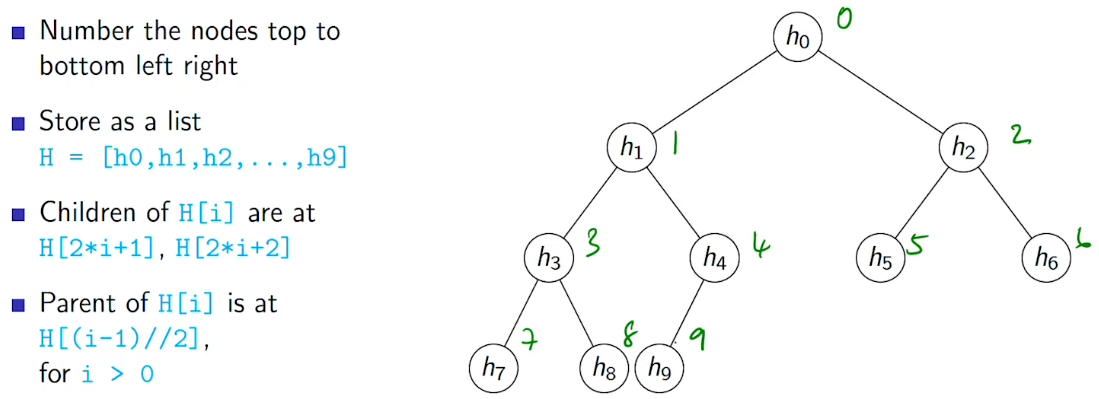

In [ ]:
#here is the test

print('Parent list : ',[(i,(i-1)//2) for i in range(1,9+1)])


Parent list :  [(1, 0), (2, 0), (3, 1), (4, 1), (5, 2), (6, 2), (7, 3), (8, 3), (9, 4)]


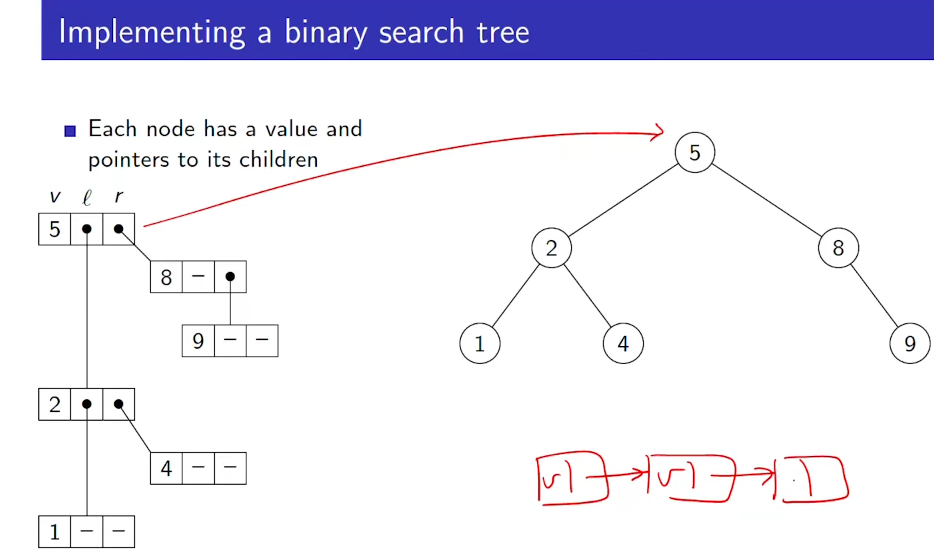


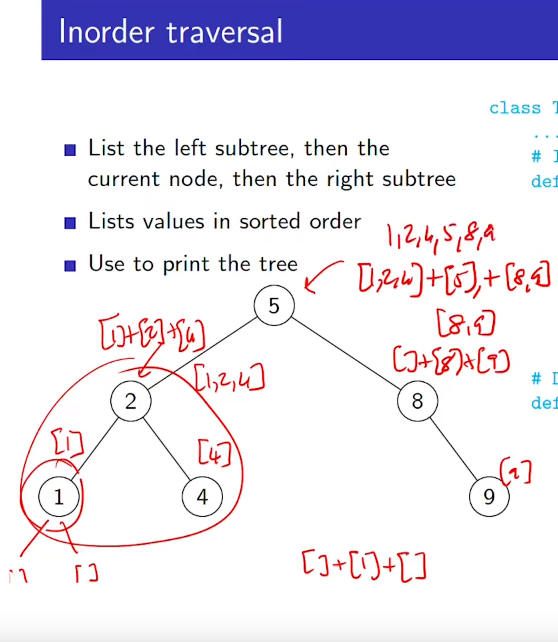

Note


If
1. is this node
2. is left node
3. is right node

the

**213** is *in order*

**231** is *post order*

**123** is *pre order*

In [ ]:
class tree:
  def __init__(self,val = None):
    self.value = val
    #generation of left and right node
    if self.value:
      self.left = tree()
      self.right = tree()

    # assigning the left and right pointer to None as they are terminal
    else:
      self.left = None
      self.right = None

  #to check whether the node is empty or not
  def is_empty(self):
    return self.value == None

  #to check terminal nodes
  def is_leaf(self):
    return (self.left == None and self.right == None)

  #display as a asc sorted linear series
  def inorder(self):
    if self.isempty():
      return ([])

    else:
      return(self.left.inorder()+[self.value]+self.right.inorder())


  def find(self,val):
    #base cases

    #if we reach the end of tree
    if self.value == None:
      return False

    #if we find the value in the tree
    if self.value == val:
      return True


    #recursive call
    #go to left if the value is smaller than the current
    if self.value > val:
      return(self.left.find(val))


    #go to right if the value is greater than current
    if self.value < val:
      return(self.right.find(val))


  def find_max(self):
    #base case
    if self.right.isempty():
      return self.value

    #recursively go right
    return self.right.find_max()

  def find_min(self):
    #base case
    if self.left.isempty():
      return self.value

    #reccursively go left
    return self.left.find_max()


  def insert(self,val):
    #base case
    if self.value == val:
      return

    if self.isempty():
      self.value = val
      self.left = tree()
      self.right = tree()
      return

    if self.value > val:
      self.left.insert(val)
      return

    if self.value < val:
      self.right.insert(val)
      return

  def delete(self,val):
    if self.isempty():
      return

    if self.value < val:
      self.right.delete(self,val)
      return

    if self.value > val:
      self.left.delete(self,val)
      return

    if self.value == val:
      if self.is_leaf():
        self.make_empty()
      elif self.left.is_empty():
        self.value = self.copy_right()
      elif self.right.is_empty():
        self.value = self.copy_left()
      else:
        temp = self.left.find_max()
        self.value = temp
        self.left.delete(temp)
      return


  def make_empty(self):
    self.value = None
    self.left = None
    self.right  = None
    return

  def copy_right(self):
    self.value = self.right
    self.left = self.right.left
    self.right = self.right.right
    return

  def copy_left(self):
    self.value = self.left
    self.left = self.left.left
    self.right = self.left.right

    return
  def rotate_left(self):
    old_value = self.value
    old_right_value = self.right.value

    old_tree_left = self.left
    old_tree_right_left = self.right.left
    old_tree_right_right = self.right.right


    #making the new left
    new_left = tree(old_value)
    new_left.right = old_tree_right_left
    new_left.left = old_tree_left

    #making the new right
    self.value = old_right_value

    #joining new left and right at the current node
    self.right = old_tree_right_right
    self.left = new_left

  def rotate_right(self):

    #for swapping the value of new left and right
    old_value = self.value
    old_left_value = self.left.value

    #old truncated tree
    old_tree_right = self.right
    old_tree_left_right = self.left.right
    old_tree_left_left = self.left.left

    #making new truncated left
    new_tree_right = tree(old_value)
    new_tree_right.right = old_tree_right
    new_tree_right.left = old_tree_left_right

    self.value = old_left_value

    self.left = old_tree_left_left
    self.right = new_tree_right


  #display as a string
  def __str__(self):
    return (str(self.inorder()))

####Balancing a Binary tree

- **Balance**: left and right side should be balanced
  - What to balance?
    - we dont use size as that is too restrictive

    - we use height and  the height on left is one more than the right

- **AVL Tree**
  - *Minimum size height balance tree*
  - So in AVL tree, to have a minimum balance tree(i.e. miminum number of nodes) of height $h$ we have
  1. Left Subtree of min  tree of $h-1$
  2. Right Subtree of height $h-2$

  and hence the net height is $h-1 +1 = h$

It is clear that the above can be done recrusively

\begin{align}
\\ \text{So if we let } &S(h) \text{ as the smallest height}
\\
\\ S(h) &= 1 + S(h-1) + S(h-2)
\\
\\ &\text{compare to fibonacci recurrance}
\\
\\ F(n) &= F(n-1) + F(n-2)
\\
\\ &\text{therefore it can be concluded that }
\\
\\ S(h) &> F(n)
\end{align}

It is a well established fact that fibonachi explodes at approximately

$2^{something}$ so the height is in $\log_2$ => similar behaveour for recurrance of balanced binary tree



Now note how, we can use height to balance a tree,

def. slope of a tree $=$ self.left.height $-$ self.right.height

When in balance, slope $=$ $\{-1,0,1\}$

when insert or delete is peformed on the tree, then the slope can be disturbed to $+2$ or $-2$


*Our aim is to restore balance by doing left or right rotations*

**For Left Rotation**
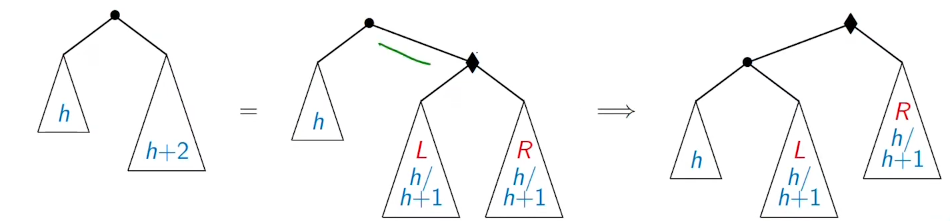


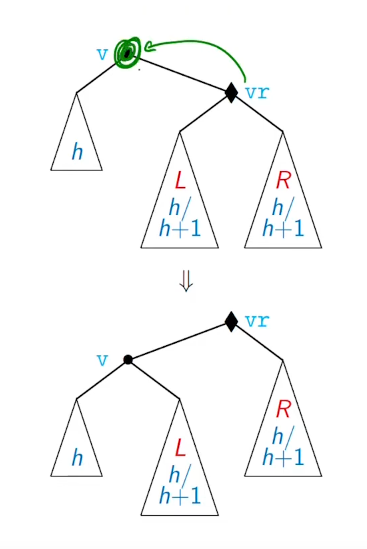

**So for Right Rotation**

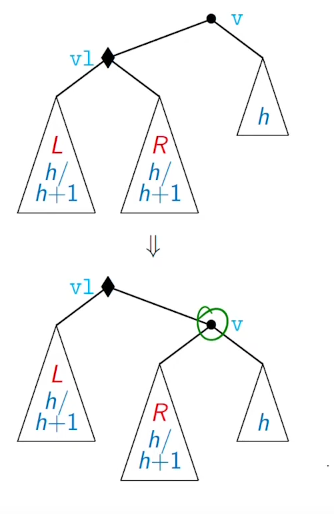

# Algorithm Design Methods

## Greedy design

1. Makes next choices based on the best selection/optimisation of local criterion

2. Never revisies what has been added to the solution


- Some old examples that we have implimented are
  - *Dijkstra's algo* which only worked for non negative edge weights
  - *Prims algo* which found the minimum cost spanning tree by selecting the vertex b/w non visited components
  - *Kruskals algo* Selecting smallest edges and joining components in disjoint trees

  



Some types of greedy algo

- Given room usuage and time slot, greedy algo by using the closest finish time
- lateness/ deadline delay minimisation by seleccting the closest deadline task first


- Huffman Coding
  - Prefix coding
    - Suppose we have
      
      a-01 b-11 c- 101
     
     then given length of bits
     
     **101110111** is not ambigious as


    (101)(11)(01)(11) -> cbab

- A fully filled Binary tree can be used for this representation.

- claims
  - An optimal prefix code produces a full tree
  - $f(x)$ be the probablity of occurance of letter $x$ then if $y$ is at a greater depth than x $\implies f(y)>f(x)$
  -For optimim tree; the deepest node always has a sister

- Some formulas
let $A = (x_1,x_2,x_3... x_n)$
  - $$\text{avg no of bits per letter} = \sum_{x ϵ A}{f(x)×|E(x)|}$$
    - where $E(x)$ represents prefix code and mod of it is no of bits in the code
    - $f(x)$ represent the probablity of that letter occuring
  


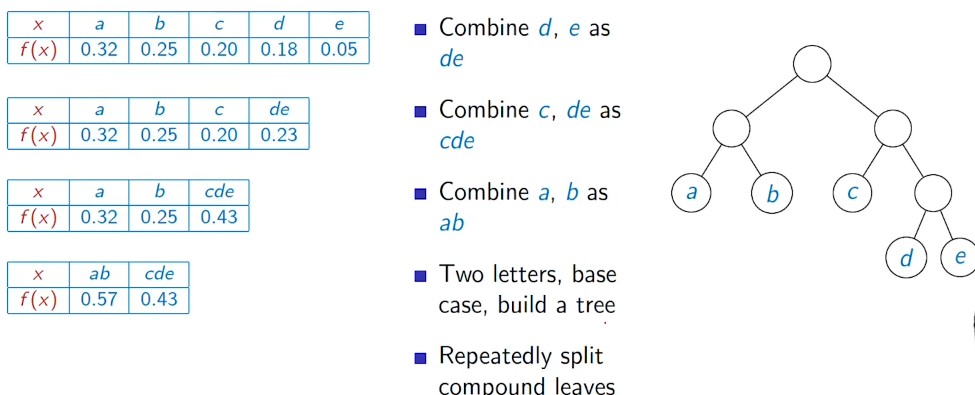

In [ ]:
def date_scaled_number(s):
    st = ''.join([i for i in s if i != ':'])
    return int(st)

def minimum_platform(schedule):
    temp = [(schedule[i][0],date_scaled_number(schedule[i][1]),date_scaled_number(schedule[i][2])) for i in range(len(schedule))]
    arrival = []
    departure = []
    for i,j,k in temp:
        arrival.append((i,j))
        departure.append((i,k))
    arrival = sorted(arrival,key = lambda x:x[1])
    departure = sorted(departure,key = lambda x:x[1])
    m = 0
    lst = []
    curr_time = 0
    while len(arrival)>0 and len(departure)>0:
        if arrival[0][1]<departure[0][1]:
            curr_time = arrival[0][1]
            tem = arrival.pop(0)
            lst.append(tem[0])
            m = max(m,len(lst))
            continue
        else:
            lst.remove(departure[0][0])
            curr_time = departure[0][1]
            departure.pop(0)
            continue

    return m


In [ ]:
def no_overlap(L):
    # Sort the list based on end_day
    sorted_L = sorted(L, key=lambda x: x[2])

    result = []
    last_end = 0

    for id, start, end in sorted_L:
        if start > last_end:
            result.append(id)
            last_end = end

    return result

##Divide and Conquer

- Breaks problem in Disjoint parts
- these disjoint part in turn can be solved efficiently

- Example
  - *Merge Sort*
  - *Quick Sort*



### Counting inversions

- Used to see how many times, there are inversions/change in ordering of a list
- Can also be used as the mechanism behind abstracted similarity preference by letting one set of permutations as sorted and other's inversion is counted wrt that sorted lsit

Max no of inversions : $\frac{n(n-1)}{2}$

Graphically:


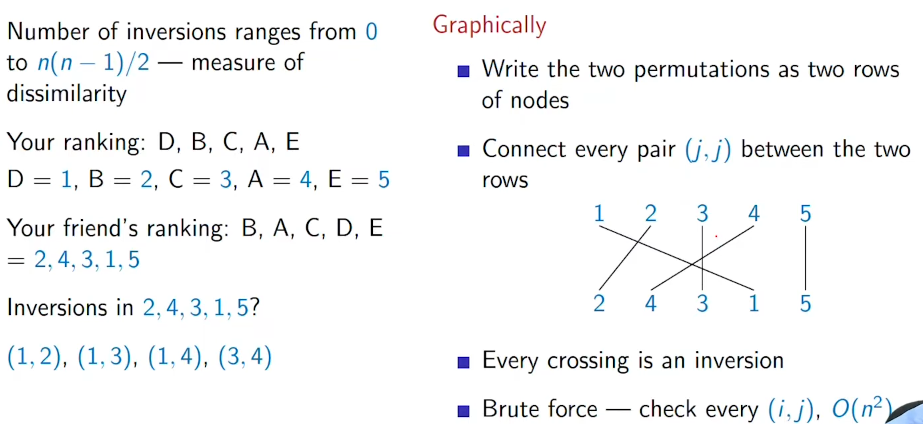


The brute force method will take $O(n^2)$ time

However there is a better method as well which uses modified merge sort

each array is broken down recrusively Till we reach the base case and we sort and count with the merge sort

The addition of structure as the stack call collapse leaads to decrease in time complexity to $O(n\log n)$

Everytime we have to use the  merge function and pull an element from the right list, then we increase the count of inversion by the no of elements left in the left list as they should have been merged first in case of no inversion


In [ ]:
def merge_and_count(lst1,lst2):
  (m,n,k,i,j,count) = (len(lst1),len(lst2),0,0,0,0)
  merged = []
  while k < m+n:
    if i == m:
      merged.append(lst2[j])
      k+=1
      j+=1
      continue
    elif j == n:
      merged.append(lst1[i])
      k+=1
      i+=1
      continue
    elif lst1[i] < lst2[j]:
      merged.append(lst1[i])
      i+=1
      k+=1
    else:
      merged.append(lst2[j])
      j+=1
      k+=1
      count +=len(lst1)-i

  return (merged, count)


In [ ]:
import sys
sys.setrecursionlimit(2**31-1)


def sort_and_count(lst):
  temp = len(lst)

  if temp<=1:
    return (lst,0)

  (left_lst,left_count) = sort_and_count(lst[:temp//2])
  (right_lst,right_count) = sort_and_count(lst[temp//2:])

  (merged_lst,current_count) = merge_and_count(left_lst,right_lst)

  return (merged_lst,left_count+right_count+current_count)


In [ ]:

print(sort_and_count([12,15,3,23,10,18]))


([3, 10, 12, 15, 18, 23], 6)


### Closest point

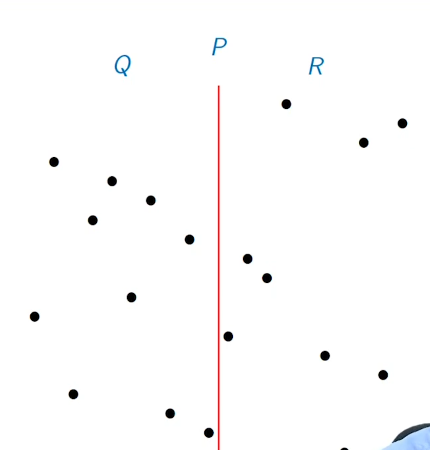

Here p is at the median of the sorted x points

let $P = \{p_1,p_2...p_n\}$
- we compute $p_x$ viz. p sorted by x co ordinate
- $p_y$ viz. p sorted by y co ordinate

P is then split into two halves, Q and R

- We sort the point wrt x and store it in Px
- We also sort the points wrt y and store it in Py
- We partition the points into Q and R based on left or right of the median of Px
- Q_x are left points x and Rx are right points wrt x
- in a similar sspirit we do a linear scan bottom up of Py and check wrt median and put the Qy and Ry in their respective brackets
- we make a recursive function closest path thar returns the smallest distance b/w point
- to checck if an
  

In [ ]:
import math

def point_sorted_x(lst):
  return (sorted(lst,key = lambda x:x[0]))
def point_sorted_y(lst):
  return (sorted(lst,key = lambda x:x[1]))

def Q_x(lst):
  return lst[:len(lst)//2]
def R_x(lst):
  return lst[len(lst)//2:]

def Q_yandR_y(lst,t):
  R_y= []
  Q_y= []
  for i in lst:
    if i[0]>t[0]:
      R_y.append(i)
    else:
      Q_y.append(i)

  return Q_y,R_y

def S_y(Q_y,R_y,delta):
  s = []
  temp = len(Q_y)
  for i in range(temp):
    if (R_y[0][0] - Q_y[i][0]) <= delta:
      s.append(Q_y[i])
  temp = len(R_y)
  for i in range(1,temp):
    if (R_y[i][0] - R_y[0][0]) <= delta:
      s.append(R_y[i])

  s = point_sorted_y(s)
  return s

def get_distance(a,b):
  return ((a[0]-b[0])**2+(a[1]-b[1])**2)

def find_dis_s(lst):
  m = [math.inf]
  l= len(lst)
  for i in range(0,l-1):
    for j in range(i+1,min(l,i+16)):
      temp = get_distance(lst[i],lst[j])
      if temp<m[0]:
         m = [temp,lst[i],lst[j]]
  return m


def closestPath(P_x,P_y):
    if len(P_x)<= 3:
        _ = len(P_x)
        if _ == 1:
            return get_distance(P_x[0],P_x[1])
        min_ = [math.inf]
        for i in range(_):
            for j in range(i+1,_):
                if min_[0]>get_distance(P_x[i],P_x[j]):
                    min_ = (get_distance(P_x[i],P_x[j]),P_x[i],P_x[j])
        return min_
    Qx = Q_x(P_x)
    Rx = R_x(P_x)
    Qy,Ry = Q_yandR_y(P_y,Rx[0])

    (dis_q,q1,q2) = closestPath(Qx,Qy)
    (dis_r,r1,r2) = closestPath(Rx,Ry)

    delta = min(dis_q,dis_q)
    Sy = S_y(Qy,Ry,delta)
    min_s = find_dis_s(Sy)

    if min_s[0] <= delta:
      return min_s
    elif dis_q < dis_r:
      return (dis_q,q1,q2)
    else:
       return (dis_r, r1,r2)

def driver_func():
  lst = []
  temp = closestPath(point_sorted_x(lst),point_sorted_y(lst))
  return (math.sqrt(temp[0]),temp[1],temp[2])

print(driver_func())


(7.211102550927978, (110173, 6056), (110167, 6060))


###Multipication

suppose we have $x_1 \times y_1$ in a base $10$ then we usually do it by partial product

However here let us assume a base 2 binary multipication

$x$ and $y$ can be split to


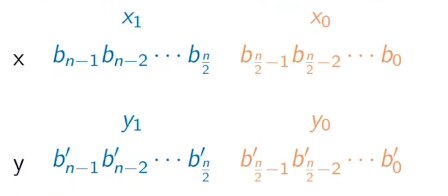

###Quick Select


Suppose we want the $k^{th}$ largest element in a list

then if we use the pivot analogy of quick sort then

- let `m = len(lower)`
  - `k<=m` then k is before m
  - `k == m+1` then this is the kth element
  - `k > m+1` then the kth element is in the upper list

This is similar to the binary search

- There is a recrusive method avalable
  - Case 1 select`(lower,k)`
  - Case 2 return `(pivot)`
  - Case 3 select `(upper,k-(m+1))`

In [ ]:
def quick_select(lst,lower,upper,k):
    if k<1 or k > upper - lower:
        return None
    left,right,pivot = lower+1,lower+1,lst[lower]
    for i in range(lower+1,upper):
        if lst[i] > pivot:
            right +=1
        else:
            (lst[left],lst[i]) = (lst[i],lst[left])
            left+=1
            right+=1
    (lst[lower],lst[left-1]) = (lst[left-1],lst[lower])
    left-=1
    lower_len = left - lower
    if  k <= lower_len:
        quick_select(lst,lower,left,k)
    elif lower_len+1 == k:
        return (pivot)
    else:
        quick_select(lst,left+1,right,k-(lower_len+1))


print(quick_select([3, 2, 1, 5, 4],0,5,5))

None


Median of medians

1. divide the array into groups of 5

2. Then find the median of these by brute force

3. Work to find this is a constant time

4. REcursively find the medians



In [ ]:
def median_of_medians(lst):
  if len(lst)<=5:
    lst.sort()
    return lst[len(lst)//2]

  m = []
  for i in range(0,len(lst),5):
    temp = lst[i,i+5]
    temp.sort()
    m.append(temp[len(temp)//2])

  return (median_of_median(m))

now $x = x_0 \times (x_1).2^\frac{n}{2}$

and $y = y_0 \times (y_1).2^\frac{n}{2}$

$$xy = (x_0 \times (x_1).2^\frac{n}{2}).(y_0 \times (y_1).2^\frac{n}{2})$$

which can be regrouped as

$$xy = x_1y_1×2^n + (x_1y_0 + x_0y_1)2^{n/2} + x_0y_0$$

therefore there are 4 $n/2$ bit multipication with a n bit addition

now see that
\begin{align}
(x_1-x_0)(y_1-y_0) &= x_1y_1 + x_0y_0 - (x_1y_0 + x_0y_1)\\
\implies (x_1y_0 + x_0y_1) &= x_1y_1 + x_0y_0 - (x_1-x_0)(y_1-y_0)\\
\text{using above}\\
xy = x_1y_1×2^n + (x_1y_1 + x_0y_0 - (x_1-x_0)(y_1-y_0))2^{n/2} + x_0y_0
\end{align}

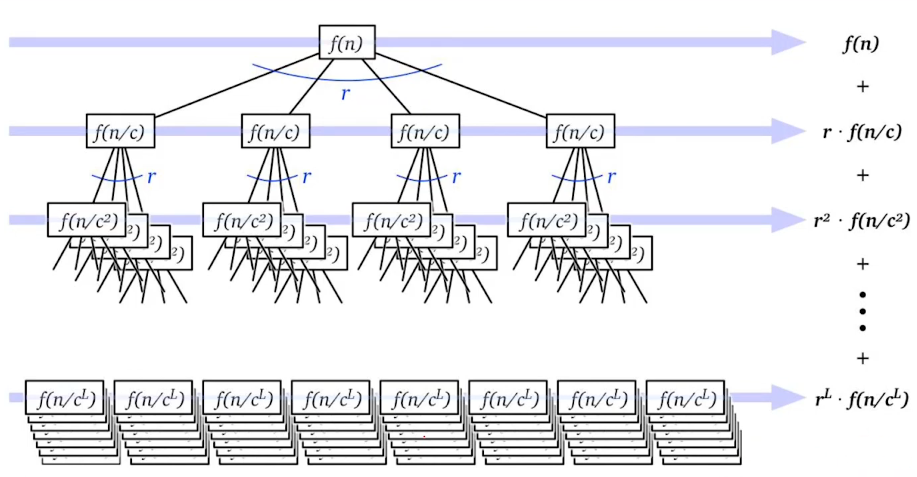

## Recurrance

Assume $n$ is the size of input
1. $f(n)$ is the non recursive work in each node
2. $r$ are the number of recursive calls
3. $c$ is the magnitude by which the work is being split in each call

therefore we can say that for a given function the total depth is $\log_cn$

and at each level, the non recrusive work for a node is $f(n/c^i)$

Therefore total cost can be made to be

$$T(n) = ∑_{i=0}^{log_cn}r^if(n/c)$$

also number of leaves is $r^{log_cn}$ which is same as $n^{log_cr}$


Let number of levels be $L=log_cn$

The total cost of a series can either

1. decrease
- Root dominates the sum => $T(n)=O(f(n))$
2. Remain same
- Total cost of node is same
- $T(n)=O(f(n).L) \text{ which is same as } O(f(n).\log_c{n}$
3. Increasing
- Leaf sum dominates
- $T(n) = n^{L} = n^{log_cr}$

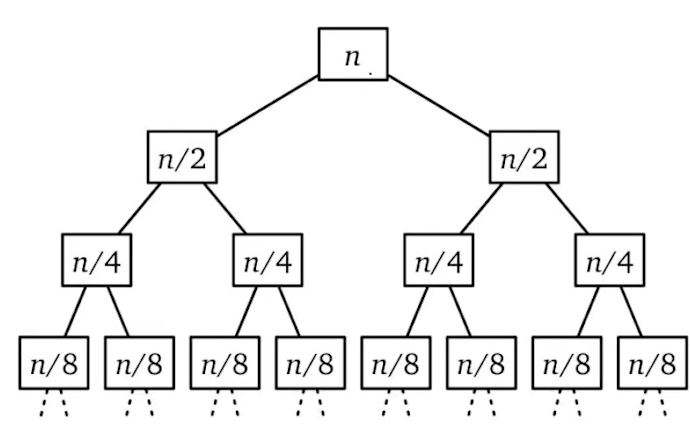


The above is for merge sort
$T(n) = 2T(n/2) +n$
Each level series is equal

$T(n) = O(n\log n)$

# Dynamic Programming



**Why?**

Consider a leap of faith like recursive solution to get a ordered set of doing a task optimialy

suppose $a_1,a_2,...a_n$ and let the solution be $b_1,b_2,...b_n$

then in a inductive leap of faith method we go foe each node in A
i.e.

let $a_i$ be the part of solution and assime everything before $a_i$ is already in the solution

also let $a_i$ not be in the solution and check the rest

this sort of recurive leap of faith solution on practice would end up checing each subset irrespective of repeating substrings

i.e. $O(2^n)$

Therefore to only check for the repaeating substrings/sets only once we use dynamic programming... this ends up reducing the timecomplexity from exploding

**Top to bottom approach**


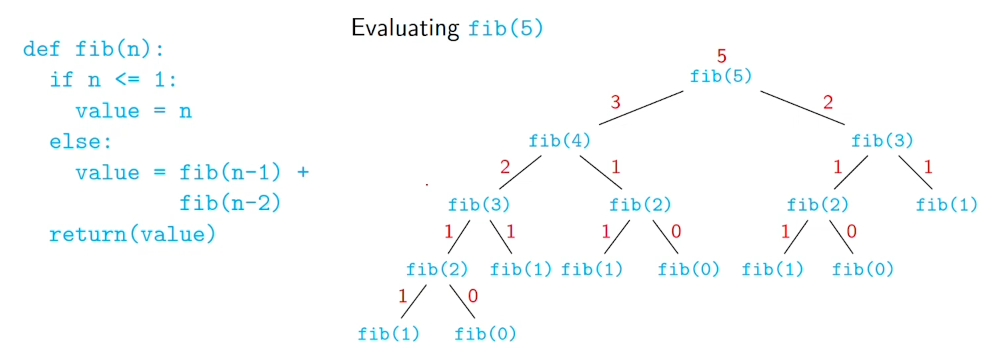

###Memoization


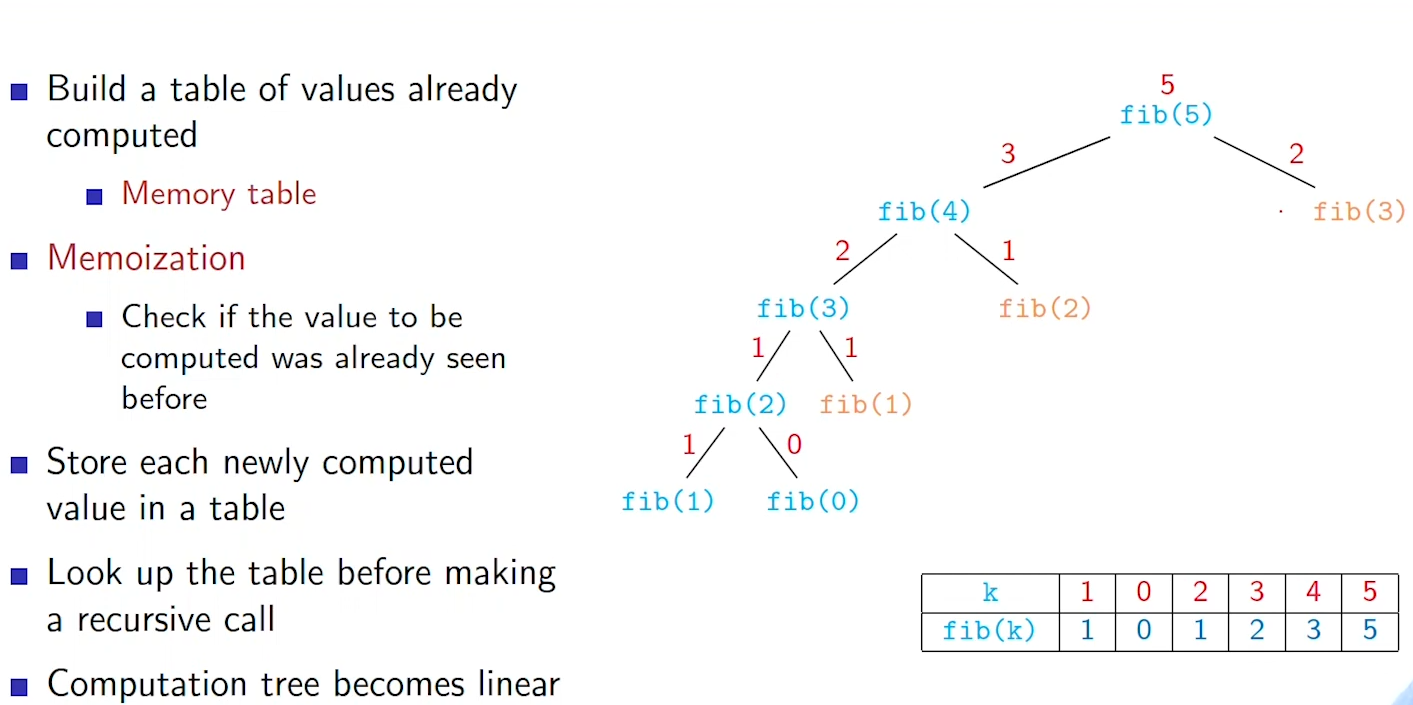

Naive Method

DO NOT RUN!!

In [ ]:
def fib_naive(n):
  if n<=1:
    return n
  else:
    return  fib_naive(n-1)+fib_naive(n-2)


Using a fib table

In [ ]:
fibtable = {}

def fib(n):
  if n in fibtable.keys():
    return fibtable[n]
  elif n<=1:
    fibtable[n] = n
    return n
  else:
    fibtable[n] = fib(n-1) + fib(n-2)
    return fibtable[n]

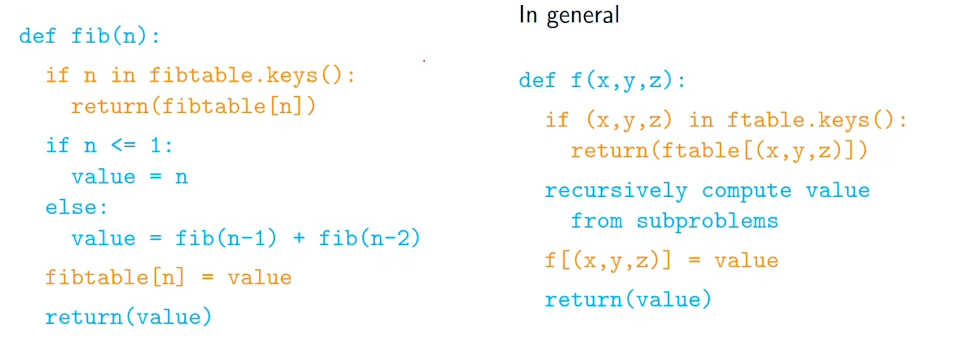

##Dynamic

- There is always a dependency structure when dealing with such problem

- Derived from inductive defination
- These dependencies end up forming a directed acyclic graph
  - Remember such dags can be solved by topological sort
  - ergo recursive calls are not required

**Bottom Up approach**

The development of a dynamic-programming algorithm can be broken into a
sequence of four steps.
1. Characterize the structure of an optimal solution.
2. Recursively define the value of an optimal solution.
3. Compute the value of an optimal solution in a bottom-up fashion.
4. Construct an optimal solution from computed information.



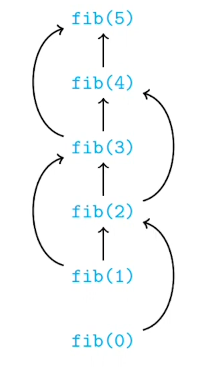

Finding the longest substring efficiently

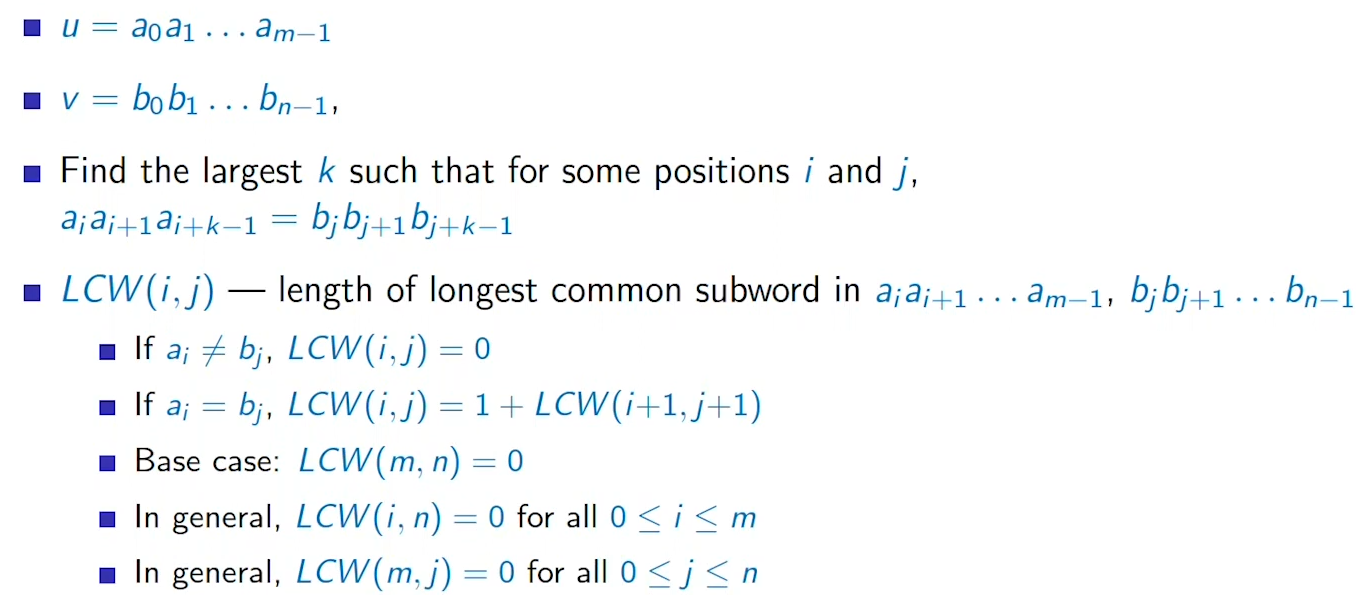

therefor we are able to find
- Base Case
  - starting letters are not equal : $a_i != b_j$
  - Reaching the end
    - reaching the end of both strings (LWC(m,n))
    - reaching the end of first string (LWC(m,j))
    - reaching the end of second string (LWC(i,n))
- Computing case
  - If $a_i = b_j$ then LCW(i,j) = 1 + (LCW(i+1 , j+1))
    - The above in english is just saying that LWC of current is 1 more then the LWC of the next letter

In [ ]:
def LCW(u,v):
  import numpy as np
  (m,n)=(len(u),len(v))
  lcw = np.zeros((m+1,n+1))

  max_lcw = 0
  index = -1

  for i in range(m-1,-1,-1):
    for j in range(n-1,-1,-1):
      if u[i] == v[j]:
        lcw[i,j] = lcw[i+1,j+1] + 1
        if lcw[i,j]>max_lcw:
          max_lcw = lcw[i,j]
          index = (i,j)

  temp = lcw[index[0],index[1]]
  substr = []

  while temp!=0:
    substr.append(u[index[0]])
    index = (index[0]+1,index[1]+1)
    temp = lcw[index[0],index[1]]

  substr = "".join(substr)
  return max_lcw,lcw,substr

In [ ]:
print(LCW("string","substring"))

(6.0, array([[1., 0., 0., 6., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 5., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), 'string')


In [ ]:
def lcs(u,v):
  import numpy as np
  (m,n) = (len(u),len(v))

  lcs = np.zeros((m+1,n+1))
  path=list()
  last_max = 0

  for i in range(n-1,-1,-1):
    for j in range(m-1,-1,-1):
      if (v[i]==u[j]):
        lcs[j,i] = 1+lcs[j+1,i+1]
      else:
        lcs[j,i] = max(lcs[j+1,i],lcs[j,i+1])
  print(path)
  return (lcs)


In [ ]:
def lcs(u):
  import numpy as np
  v=u
  (m,n) = (len(u),len(v))

  lcs = np.zeros((m+1,n+1))
  path=list()
  last_max = 0

  for i in range(n-1,-1,-1):
    for j in range(m-1,-1,-1):
      if (v[i]>u[j]):
        lcs[j,i] = 1+lcs[j+1,i+1]
      else:
        lcs[j,i] = max(lcs[j+1,i],lcs[j,i+1])
  return (lcs)


In [ ]:
print(lcs(['a','b','c','b'],['a','b']))

[]
[[2. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [0. 0. 0.]]


In [ ]:


def LDS(lst):
  weird = list()
  n=len(lst)
  m = (-1,None)
  for i in range(0,n):
    temp = 0
    for j in range(i,n):
      if lst[i]>lst[j]:
        temp+=1
    m=(max(temp,m[0]),i)
    weird.append(temp)
  ans = list()
  prev_max = m[0]
  for i in range(m[1],n):

  return weird,m

In [ ]:
print(LDS([0,2,7,3,7,3,8,2,1,0]))

([0, 2, 5, 3, 4, 3, 3, 2, 1, 0], (5, 9))


Document Similarity

We use edit options to transform a document form one form to another

- insert a character
- delete a character
- substitute one character with another

We are trying to compute levenshtein distance

$\sum _{j=1}^{n}a_j$